In [3]:
import pandas as pd
from pathlib import Path
from functools import reduce
import huggingface_hub

pd.set_option('display.max_columns', None)

huggingface_hub.login()

In [4]:
BASE_DIR = Path('data/cleaned')

ispu_df = pd.read_csv(BASE_DIR / 'ISPU_2010-2025.csv')
weather_df = pd.read_csv(BASE_DIR / 'weather_2010-2025.csv')
populasi_df = pd.read_csv(BASE_DIR / 'populasi_2010_2025.csv')
river_df = pd.read_csv(BASE_DIR / 'river_quality_2010-2025.csv')
ndvi_df = pd.read_csv(BASE_DIR / 'ndvi_2010_2025.csv')
libur_df = pd.read_csv(BASE_DIR / 'libur_nasional.csv')

In [5]:
ispu_df['tanggal'] = pd.to_datetime(
    ispu_df['tanggal'],
    format = 'mixed',
    errors = 'raise'
)
ispu_df = ispu_df.drop(columns = ['ID', 'periode_data', 'max', 'year', 'parameter_pencemar_kritis'])
ispu_df['kategori'] = ispu_df['kategori'].apply(
    lambda x: 'TIDAK SEHAT' if x in ['BERBAHAYA', 'SANGAT TIDAK SEHAT'] else x
)

weather_df['time'] = pd.to_datetime(
    weather_df['time'],
    format = 'mixed',
    errors = 'raise'
) 
weather_df.rename(columns={'time': 'tanggal'}, inplace=True)
weather_df = weather_df.drop(columns = 'ID')

populasi_df['tanggal'] = pd.to_datetime(
    populasi_df['tanggal'],
    format = 'mixed',
    errors = 'raise'
)

river_df['tanggal'] = pd.to_datetime(
    river_df['tanggal'],
    format = 'mixed',
    errors = 'raise'
)
river_df = river_df.drop(columns = ['year', 'month'])

ndvi_df['tanggal'] = pd.to_datetime(
    ndvi_df['tanggal'],
    format = 'mixed',
    errors = 'raise'
)

libur_df['tanggal'] = pd.to_datetime(
    libur_df['tanggal'],
    format = 'mixed',
    errors = 'raise'
)
libur_df = libur_df.drop(columns = ['day_name'])

In [6]:
dfs_to_merge = [weather_df, populasi_df, river_df, ndvi_df]

ispu_df = reduce(
    lambda left, right: pd.merge(left, right, on=['tanggal', 'stasiun'], how='left'),
    dfs_to_merge,
    ispu_df
)

# Merge libur_df on tanggal only (no stasiun column)
ispu_df = pd.merge(ispu_df, libur_df, on='tanggal', how='left')

In [7]:
ispu_df

,tanggal,stasiun,pm_sepuluh,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,kategori,temperature_2m_max (°C),temperature_2m_min (°C),precipitation_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),temperature_2m_mean (°C),relative_humidity_2m_mean (%),cloud_cover_mean (%),surface_pressure_mean (hPa),wind_gusts_10m_max (km/h),winddirection_10m_dominant (°),relative_humidity_2m_max (%),relative_humidity_2m_min (%),cloud_cover_max (%),cloud_cover_min (%),wind_gusts_10m_mean (km/h),wind_speed_10m_mean (km/h),wind_gusts_10m_min (km/h),wind_speed_10m_min (km/h),surface_pressure_max (hPa),surface_pressure_min (hPa),jumlah,biological_oxygen_demand,cadmium,chemical_oxygen_demand,chromium_vi,copper,fecal_coliform,lead,mbas_detergent,mercury,oil_and_grease,ph,total_coliform,total_dissolved_solids,total_suspended_solids,zinc,ndvi,is_holiday_nasional,nama_libur,is_weekend
0,2010-01-01,DKI1,60.0,4.0,73.0,27.0,14.0,SEDANG,29.4,24.4,4.0,14.0,16.0,246,16.24,26.6,81,100,1007.5,38.2,246,90,69,100,99,21.0,10.5,11.9,6.9,1009.3,1005.1,898883,412.259889,0.00755,77.333889,0.00295,0.0131,2.580343e+09,0.030350,302.780222,0.500198,243.499367,686.243111,3.658939e+09,272.244444,61.307778,0.031939,0.202300,1,New Year's Day,0
1,2010-01-02,DKI1,32.0,2.0,16.0,33.0,9.0,BAIK,30.8,24.0,6.5,4.0,14.7,238,19.80,26.9,82,99,1008.1,31.3,238,93,69,100,91,16.5,7.7,9.0,4.4,1009.9,1006.0,898945,412.259889,0.00755,77.333889,0.00295,0.0131,2.580343e+09,0.030350,302.780222,0.500198,243.499367,686.243111,3.658939e+09,272.244444,61.307778,0.031939,0.203619,0,NaN,1
2,2010-01-03,DKI1,27.0,2.0,19.0,20.0,9.0,BAIK,30.4,24.3,7.6,11.0,12.6,244,17.32,26.7,83,97,1008.5,26.6,244,91,70,100,81,18.4,9.4,11.9,6.5,1010.5,1006.5,899007,412.259889,0.00755,77.333889,0.00295,0.0131,2.580343e+09,0.030350,302.780222,0.500198,243.499367,686.243111,3.658939e+09,272.244444,61.307778,0.031939,0.204937,0,NaN,1
3,2010-01-04,DKI1,22.0,2.0,16.0,15.0,6.0,BAIK,30.3,25.4,0.9,5.0,19.3,239,20.43,27.4,81,69,1007.5,34.2,239,91,70,100,17,23.8,13.5,14.4,9.6,1009.1,1005.1,899069,412.259889,0.00755,77.333889,0.00295,0.0131,2.580343e+09,0.030350,302.780222,0.500198,243.499367,686.243111,3.658939e+09,272.244444,61.307778,0.031939,0.206256,0,NaN,0
4,2010-01-05,DKI1,25.0,2.0,17.0,15.0,8.0,BAIK,29.9,24.8,14.3,7.0,15.9,247,15.86,26.4,83,100,1007.7,32.0,247,89,72,100,99,21.6,11.1,10.4,7.8,1009.1,1006.0,899131,412.259889,0.00755,77.333889,0.00295,0.0131,2.580343e+09,0.030350,302.780222,0.500198,243.499367,686.243111,3.658939e+09,272.244444,61.307778,0.031939,0.207575,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16449,2025-08-31,DKI1,42.0,29.0,12.0,15.0,24.0,SEDANG,31.1,24.0,6.4,5.0,10.9,88,19.23,27.0,80,73,1009.9,30.6,88,95,60,100,6,15.3,4.7,4.3,1.0,1011.6,1007.8,592494,612.715743,0.00590,107.000000,0.00290,0.0090,3.500000e+07,0.019000,5.000000,0.192114,81.000000,1175.945201,5.000000e+07,406.000000,53.000000,0.015000,0.494000,0,NaN,1
16450,2025-08-31,DKI2,76.0,45.0,16.0,21.0,16.0,SEDANG,31.0,23.8,19.2,8.0,10.9,99,19.73,26.9,80,74,1009.7,32.4,99,95,60,100,8,19.0,5.9,7.2,0.8,1011.5,1007.4,1096546,117.470194,0.00590,78.000000,NaN,0.0090,9.000000e+06,0.023357,19.000000,0.329452,539.000000,152.599697,1.400000e+07,1744.000000,82.000000,0.017000,0.227600,0,NaN,1
16451,2025-08-31,DKI3,28.0,53.0,8.0,19.0,39.0,SEDANG,31.3,23.0,14.2,8.0,9.1,132,19.35,26.2,84,67,1002.6,27.0,132,98,59,100,5,14.0,4.5,3.2,0.4,1004.1,1000.4,1282287,345.176329,0.00590,93.000000,0.00290,0.0090,5.000000e+07,0.019000,5.000000,0.000090,539.000000,731.741136,9.000000e+07,318.000000,32.000000,0.014000,0.479700,0,NaN,1
16452,2025-08-31,DKI4,47.0,27.0,10.0,18.0,17.0,SEDANG,31.6,23.0,12.6,6.0,10.0,122,19.03,26.5,82,64,1006.6,25.6,122,99,59,100,7,14.2,5.1,4.0,0.9,1008.1,1004.4,2168235,970.264228,0.00590,90.000000,0.0029

In [8]:
# Check dataset info
print(f"Shape: {ispu_df.shape}")
print(f"\nColumns: {ispu_df.columns.tolist()}")
print(f"\nDate range: {ispu_df['tanggal'].min()} to {ispu_df['tanggal'].max()}")
print(f"\nStations: {ispu_df['stasiun'].unique()}")

Shape: (16454, 51)

Columns: ['tanggal', 'stasiun', 'pm_sepuluh', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida', 'kategori', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'precipitation_sum (mm)', 'precipitation_hours (h)', 'wind_speed_10m_max (km/h)', 'wind_direction_10m_dominant (°)', 'shortwave_radiation_sum (MJ/m²)', 'temperature_2m_mean (°C)', 'relative_humidity_2m_mean (%)', 'cloud_cover_mean (%)', 'surface_pressure_mean (hPa)', 'wind_gusts_10m_max (km/h)', 'winddirection_10m_dominant (°)', 'relative_humidity_2m_max (%)', 'relative_humidity_2m_min (%)', 'cloud_cover_max (%)', 'cloud_cover_min (%)', 'wind_gusts_10m_mean (km/h)', 'wind_speed_10m_mean (km/h)', 'wind_gusts_10m_min (km/h)', 'wind_speed_10m_min (km/h)', 'surface_pressure_max (hPa)', 'surface_pressure_min (hPa)', 'jumlah', 'biological_oxygen_demand', 'cadmium', 'chemical_oxygen_demand', 'chromium_vi', 'copper', 'fecal_coliform', 'lead', 'mbas_detergent', 'mercury', 'oil_and_grease', 'ph', 't

## Feature Engineering for TabPFN-TS Forecasting

In [21]:
# Create working copy and sort by station and date
df = ispu_df.copy()
df = df.sort_values(['stasiun', 'tanggal']).reset_index(drop=True)
print(f"Working with {len(df)} rows")

Working with 16454 rows


In [22]:
import numpy as np

# Extract temporal features
df['day_of_year'] = df['tanggal'].dt.dayofyear
df['day_of_week'] = df['tanggal'].dt.dayofweek
df['month'] = df['tanggal'].dt.month
df['year'] = df['tanggal'].dt.year

In [23]:
# Create circular features with sin/cos
df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

In [25]:
!pip list

Package         Version
--------------- -----------
Bottleneck      1.4.2
joblib          1.5.3
mkl_fft         2.1.1
mkl_random      1.3.0
mkl-service     2.5.2
numexpr         2.14.1
numpy           2.2.5
packaging       25.0
pandas          2.3.3
pip             25.3
python-dateutil 2.9.0.post0
pytz            2025.2
scikit-learn    1.7.2
scipy           1.15.3
setuptools      80.10.2
six             1.17.0
threadpoolctl   3.5.0
tzdata          2025.3
wheel           0.46.3


In [26]:
!conda list

# packages in environment at C:\Users\ASUS\miniconda3\envs\datavidia:
#
# Name                     Version          Build                  Channel
blas                       1.0              mkl
bottleneck                 1.4.2            py310h540bb41_1
bzip2                      1.0.8            h2bbff1b_6
ca-certificates            2025.12.2        haa95532_0
expat                      2.7.4            hd7fb8db_0
icc_rt                     2022.1.0         h6049295_2
intel-openmp               2025.0.0         haa95532_1164
joblib                     1.5.3            py310haa95532_0
libexpat                   2.7.4            hd7fb8db_0
libffi                     3.4.4            hd77b12b_1
libhwloc                   2.12.1           default_hfa10c62_1000
libiconv                   1.16             h2bbff1b_3
libxml2                    2.13.9           h6201b9f_0
libzlib                    1.3.1            h02ab6af_0
mkl                        2025.0.0         h5da7b33_930
mkl-servi

In [24]:
from sklearn.preprocessing import LabelEncoder

# Encode stasiun
le_stasiun = LabelEncoder()
df['stasiun_encoded'] = le_stasiun.fit_transform(df['stasiun'])

# Encode nama_libur (handle NaN)
df['nama_libur_filled'] = df['nama_libur'].fillna('no_holiday')
le_libur = LabelEncoder()
df['nama_libur_encoded'] = le_libur.fit_transform(df['nama_libur_filled'])

ImportError: cannot import name 'LabelEncoder' from 'sklearn.preprocessing' (unknown location)

In [ ]:
# Define columns for lag/rolling features
exclude_cols = ['tanggal', 'stasiun', 'kategori', 'is_holiday_nasional', 'is_weekend', 
                'nama_libur', 'nama_libur_filled', 'day_of_year', 'day_of_week', 'month', 'year',
                'day_of_year_sin', 'day_of_year_cos', 'day_of_week_sin', 'day_of_week_cos',
                'month_sin', 'month_cos', 'stasiun_encoded', 'nama_libur_encoded']

numerical_cols = [col for col in df.columns if col not in exclude_cols]
print(f"Creating lag features for {len(numerical_cols)} columns")

Creating lag features for 45 columns


In [ ]:
# Create lag features for each station
lag_windows = [1, 3, 5, 7]

for col in numerical_cols:
    for lag in lag_windows:
        df[f'{col}_lag_{lag}'] = df.groupby('stasiun')[col].shift(lag)

In [ ]:
# Create rolling mean features for each station
for col in numerical_cols:
    for window in lag_windows:
        df[f'{col}_rolling_{window}'] = df.groupby('stasiun')[col].transform(
            lambda x: x.rolling(window=window, min_periods=1).mean()
        )

In [ ]:
# Create rolling std features (volatility indicators)
for col in numerical_cols:
    for window in [3, 7]:
        df[f'{col}_rolling_std_{window}'] = df.groupby('stasiun')[col].transform(
            lambda x: x.rolling(window=window, min_periods=1).std()
        )

In [ ]:
# Check final shape
print(f"Final shape after feature engineering: {df.shape}")

Final shape after feature engineering: (16454, 514)


## Prepare Data for Forecasting

In [ ]:
# Split into train (up to 2025-08-31) and forecast period (2025-09-01 to 2025-11-30)
train_df = df[df['tanggal'] <= '2025-08-31'].copy()
print(f"Training data: {train_df['tanggal'].min()} to {train_df['tanggal'].max()}")
print(f"Training shape: {train_df.shape}")

Training data: 2010-01-01 00:00:00 to 2025-08-31 00:00:00
Training shape: (16454, 514)


In [ ]:
# Define target columns (parameters to forecast)
target_cols = ['pm_sepuluh', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida',
               'temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'precipitation_sum (mm)',
               'precipitation_hours (h)', 'wind_speed_10m_max (km/h)', 'jumlah',
               'biological_oxygen_demand', 'chemical_oxygen_demand', 'ph', 'ndvi']

print(f"Forecasting {len(target_cols)} target variables")

Forecasting 15 target variables


In [ ]:
# Define feature columns (exclude tanggal, kategori, stasiun, nama_libur)
exclude_from_features = ['tanggal', 'kategori', 'stasiun', 'nama_libur', 'nama_libur_filled']
feature_cols = [col for col in train_df.columns if col not in exclude_from_features]

print(f"Using {len(feature_cols)} features")

Using 509 features


In [ ]:
# Handle missing values
print(f"Missing values before: {train_df.isnull().sum().sum()}")
train_df = train_df.bfill().ffill()
print(f"Missing values after: {train_df.isnull().sum().sum()}")

Missing values before: 25612
Missing values after: 0


## XGBoost Forecasting

Using XGBoost for direct multi-output forecasting

In [ ]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor

print("XGBoost version:", xgb.__version__)

XGBoost version: 3.1.3


In [ ]:
# Define selected features (use all engineered features)
# Exclude non-numeric and identifier columns
selected_features = [col for col in feature_cols if col not in target_cols]

print(f"Selected {len(selected_features)} features for training")
print(f"Target variables: {len(target_cols)}")

# Get stations list
stations = train_df['stasiun'].unique()
print(f"Stations: {stations}")

Selected 494 features for training
Target variables: 15
Stations: ['DKI1' 'DKI2' 'DKI3' 'DKI4' 'DKI5']


In [ ]:
# Prepare training data - use selected features
X_train = train_df[selected_features].values
y_train = train_df[target_cols].values

print(f"Training data shape: X={X_train.shape}, y={y_train.shape}")
print(f"Features: {len(selected_features)}")
print(f"Targets: {len(target_cols)}")

Training data shape: X=(16454, 494), y=(16454, 15)
Features: 494
Targets: 15


In [ ]:
# Train XGBoost model (multi-output)
xgb_model = MultiOutputRegressor(
    xgb.XGBRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    )
)

print("Training XGBoost model...")
xgb_model.fit(X_train, y_train)
print("✓ Model trained successfully")

Training XGBoost model...


✓ Model trained successfully


In [ ]:
# Generate forecasts for Sept 1 - Nov 30, 2025
forecast_start = pd.to_datetime('2025-09-01')
forecast_end = pd.to_datetime('2025-11-30')
forecast_dates = pd.date_range(forecast_start, forecast_end, freq='D')

print(f"Forecasting {len(forecast_dates)} days from {forecast_start.date()} to {forecast_end.date()}")
print(f"Stations: {stations}")

Forecasting 91 days from 2025-09-01 to 2025-11-30
Stations: ['DKI1' 'DKI2' 'DKI3' 'DKI4' 'DKI5']


In [ ]:
# Iterative forecasting with feature updating
all_forecasts = []

# Create working dataframe with historical + forecast dates
forecast_df = train_df.copy()

for date in forecast_dates:
    print(f"Forecasting {date.date()}...", end=' ')
    
    # Prepare forecast rows for all stations on this date
    forecast_rows = []
    
    for station in stations:
        # Get last available data for this station
        station_data = forecast_df[forecast_df['stasiun'] == station].tail(30)  # Last 30 days
        
        # Create new row template with date and station info (use object dtype for mixed types)
        new_row = pd.Series(index=forecast_df.columns, dtype='object')
        new_row['tanggal'] = date
        new_row['stasiun'] = station
        
        # Copy temporal features (these are deterministic from date)
        new_row['day_of_year_sin'] = np.sin(2 * np.pi * date.dayofyear / 365.25)
        new_row['day_of_year_cos'] = np.cos(2 * np.pi * date.dayofyear / 365.25)
        new_row['day_of_week_sin'] = np.sin(2 * np.pi * date.dayofweek / 7)
        new_row['day_of_week_cos'] = np.cos(2 * np.pi * date.dayofweek / 7)
        new_row['month_sin'] = np.sin(2 * np.pi * date.month / 12)
        new_row['month_cos'] = np.cos(2 * np.pi * date.month / 12)
        
        # Copy encoded station
        new_row['stasiun_encoded'] = le_stasiun.transform([station])[0]
        
        # Copy base features that we don't forecast (weather, NDVI, population, water quality)
        # Exclude lag and rolling features - we'll compute those from recent history
        if len(station_data) > 0:
            latest = station_data.iloc[-1]
            
            # Identify lag and rolling feature patterns
            for feat in selected_features:
                # Skip if already set or if it's a lag/rolling feature (we'll compute these)
                if (pd.notna(new_row.get(feat, None)) or 
                    '_lag_' in feat or '_rolling_' in feat):
                    continue
                    
                # Copy base features from most recent data
                if feat in latest.index and pd.notna(latest[feat]):
                    new_row[feat] = latest[feat]
        
        # Compute lag features from recent history (including previous forecasts)
        for lag in [1, 3, 5, 7]:
            if len(station_data) >= lag:
                lag_data = station_data.iloc[-lag]
                for target in target_cols:
                    lag_col = f'{target}_lag_{lag}'
                    if lag_col in selected_features and target in lag_data.index:
                        if pd.notna(lag_data[target]):
                            new_row[lag_col] = lag_data[target]
        
        # Compute rolling mean features from recent history (including previous forecasts)
        for window in [1, 3, 5, 7]:
            if len(station_data) >= window:
                window_data = station_data.tail(window)
                for target in target_cols:
                    mean_col = f'{target}_rolling_{window}'
                    if mean_col in selected_features and target in window_data.columns:
                        if pd.notna(window_data[target]).any():
                            new_row[mean_col] = window_data[target].mean()
        
        # Compute rolling std features from recent history (only for windows 3 and 7)
        for window in [3, 7]:
            if len(station_data) >= window:
                window_data = station_data.tail(window)
                for target in target_cols:
                    std_col = f'{target}_rolling_std_{window}'
                    if std_col in selected_features and target in window_data.columns:
                        if pd.notna(window_data[target]).any():
                            new_row[std_col] = window_data[target].std()
        
        forecast_rows.append(new_row)
    
    # Convert to dataframe and prepare features
    forecast_batch = pd.DataFrame(forecast_rows)
    
    # Fill any remaining NaNs with 0 or median
    for col in selected_features:
        if col in forecast_batch.columns and forecast_batch[col].isna().any():
            if col in train_df.columns:
                forecast_batch[col].fillna(train_df[col].median(), inplace=True)
            else:
                forecast_batch[col].fillna(0, inplace=True)
    
    # Predict
    X_forecast = forecast_batch[selected_features].values
    y_pred = xgb_model.predict(X_forecast)
    
    # Add predictions to forecast batch
    for i, target in enumerate(target_cols):
        forecast_batch[target] = y_pred[:, i]
    
    # Append to working dataframe for next iteration
    forecast_df = pd.concat([forecast_df, forecast_batch], ignore_index=True)
    
    # Store results
    result = forecast_batch[['stasiun', 'tanggal'] + target_cols].copy()
    all_forecasts.append(result)
    
    print(f"✓ {len(forecast_batch)} stations")

# Combine all forecasts
final_forecast = pd.concat(all_forecasts, ignore_index=True)
print(f"\n✓ Generated {len(final_forecast)} forecast rows")

Forecasting 2025-09-01... ✓ 5 stations
Forecasting 2025-09-02... ✓ 5 stations
Forecasting 2025-09-03... ✓ 5 stations
Forecasting 2025-09-04... ✓ 5 stations
Forecasting 2025-09-05... ✓ 5 stations
Forecasting 2025-09-06... ✓ 5 stations
Forecasting 2025-09-07... ✓ 5 stations
Forecasting 2025-09-08... ✓ 5 stations
Forecasting 2025-09-09... ✓ 5 stations
Forecasting 2025-09-10... ✓ 5 stations
Forecasting 2025-09-11... ✓ 5 stations
Forecasting 2025-09-12... ✓ 5 stations
Forecasting 2025-09-13... ✓ 5 stations
Forecasting 2025-09-14... ✓ 5 stations
Forecasting 2025-09-15... ✓ 5 stations
Forecasting 2025-09-16... ✓ 5 stations
Forecasting 2025-09-17... ✓ 5 stations
Forecasting 2025-09-18... ✓ 5 stations
Forecasting 2025-09-19... ✓ 5 stations
Forecasting 2025-09-20... ✓ 5 stations
Forecasting 2025-09-21... ✓ 5 stations
Forecasting 2025-09-22... ✓ 5 stations
Forecasting 2025-09-23... ✓ 5 stations
Forecasting 2025-09-24... ✓ 5 stations
Forecasting 2025-09-25... ✓ 5 stations
Forecasting 2025-09-26...

In [ ]:
# Display forecast summary
print(f"Forecast shape: {final_forecast.shape}")
print(f"\nDate range: {final_forecast['tanggal'].min()} to {final_forecast['tanggal'].max()}")
print(f"Stations: {sorted(final_forecast['stasiun'].unique())}")
print(f"\nTarget parameters: {target_cols}")

# Sample of forecasts
final_forecast.head(10)

Forecast shape: (455, 17)

Date range: 2025-09-01 00:00:00 to 2025-11-30 00:00:00
Stations: ['DKI1', 'DKI2', 'DKI3', 'DKI4', 'DKI5']

Target parameters: ['pm_sepuluh', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'precipitation_sum (mm)', 'precipitation_hours (h)', 'wind_speed_10m_max (km/h)', 'jumlah', 'biological_oxygen_demand', 'chemical_oxygen_demand', 'ph', 'ndvi']


,stasiun,tanggal,pm_sepuluh,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,temperature_2m_max (°C),temperature_2m_min (°C),precipitation_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),jumlah,biological_oxygen_demand,chemical_oxygen_demand,ph,ndvi
0,DKI1,2025-09-01,42.087334,29.065989,12.034366,15.369245,23.800779,31.189499,24.019230,6.297104,5.113377,10.724190,5.939803e+05,612.519226,107.064087,1175.666138,0.493921
1,DKI2,2025-09-01,75.875534,45.220654,15.842077,21.030737,15.921450,31.058435,23.825880,18.145214,8.005313,10.950617,1.097207e+06,116.582062,77.986481,152.969269,0.227660
2,DKI3,2025-09-01,27.691124,52.994431,7.909587,19.402040,39.009937,31.350140,22.992662,14.407939,8.075668,9.079785,1.281881e+06,346.602325,92.985909,731.647583,0.479665
3,DKI4,2025-09-01,46.687180,26.985518,9.836836,18.091005,16.923965,31.637033,23.020956,12.474217,6.060906,10.084873,2.169152e+06,972.487183,89.983833,723.775391,0.578059
4,DKI5,2025-09-01,36.775555,25.065731,8.906713,20.988100,34.140350,31.681744,23.792238,6.972966,8.006279,9.114018,1.976111e+06,411.887756,59.186665,137.323532,0.452283
5,DKI1,2025-09-02,41.932995,29.024872,12.004125,15.130062,22.906046,31.142633,23.995193,6.133456,5.040352,10.790481,5.968684e+05,610.794250,107.064087,1174.079590,0.494164
6,DKI2,2025-09-02,75.063858,44.939156,14.942524,21.178776,14.940404,31.032801,23.827282,17.484947,7.975507,10.958732,1.097209e+06,106.629562,77.955444,152.969269,0.227660
7,DKI3,2025-09-02,26.873379,52.009693,7.156588,19.060461,38.837410,31.343203,22.900206,14.437538,8.050990,9.088176,1.274765e+06,346.259674,92.420113,725.935181,0.479665
8,DKI4,2025-09-02,45.900028,26.146116,9.061637,18.286892,16.034151,31.630548,22.990557,12.167624,5.998722,10.084873,2.169886e+06,972.487183,89.849358,715.120667,0.578059
9,DKI5,2025-09-02,35.876713,25.018053,8.061477,20.204222,34.290337,31.654949,23.692875,6.811911,7.946062,9.092217,1.976101e+06,411.786652,59.186665,137.323532,0.452283


In [ ]:
# Check for variation in forecasts
print("Checking forecast variation for DKI1:")
dki1_forecast = final_forecast[final_forecast['stasiun'] == 'DKI1'][target_cols]
print("\nStandard deviation of each parameter:")
print(dki1_forecast.std())
print("\nValue ranges:")
for col in ['pm_sepuluh', 'ozon', 'temperature_2m_max (°C)', 'ndvi']:
    vals = dki1_forecast[col]
    print(f"{col}: min={vals.min():.2f}, max={vals.max():.2f}, std={vals.std():.4f}")

Checking forecast variation for DKI1:

Standard deviation of each parameter:
pm_sepuluh                      0.979982
sulfur_dioksida                 0.004852
karbon_monoksida                0.176956
ozon                            0.249802
nitrogen_dioksida               4.524842
temperature_2m_max (°C)         0.007891
temperature_2m_min (°C)         0.014109
precipitation_sum (mm)          0.032533
precipitation_hours (h)         0.552517
wind_speed_10m_max (km/h)       0.013006
jumlah                       7157.716797
biological_oxygen_demand        1.611126
chemical_oxygen_demand          0.000386
ph                             88.730026
ndvi                            0.000026
dtype: float32

Value ranges:
pm_sepuluh: min=37.08, max=42.09, std=0.9800
ozon: min=14.07, max=15.37, std=0.2498
temperature_2m_max (°C): min=31.12, max=31.19, std=0.0079
ndvi: min=0.49, max=0.49, std=0.0000


In [ ]:
# Save forecast results
output_path = BASE_DIR / "xgboost_forecast_sept_nov_2025.csv"
final_forecast.to_csv(output_path, index=False)
print(f"✓ Forecast saved to: {output_path}")

# Also check for missing values
missing = final_forecast[target_cols].isna().sum()
if missing.sum() > 0:
    print(f"\n⚠ Missing values found:")
    print(missing[missing > 0])
else:
    print("\n✓ No missing values in forecasts")

✓ Forecast saved to: data\cleaned\xgboost_forecast_sept_nov_2025.csv

✓ No missing values in forecasts


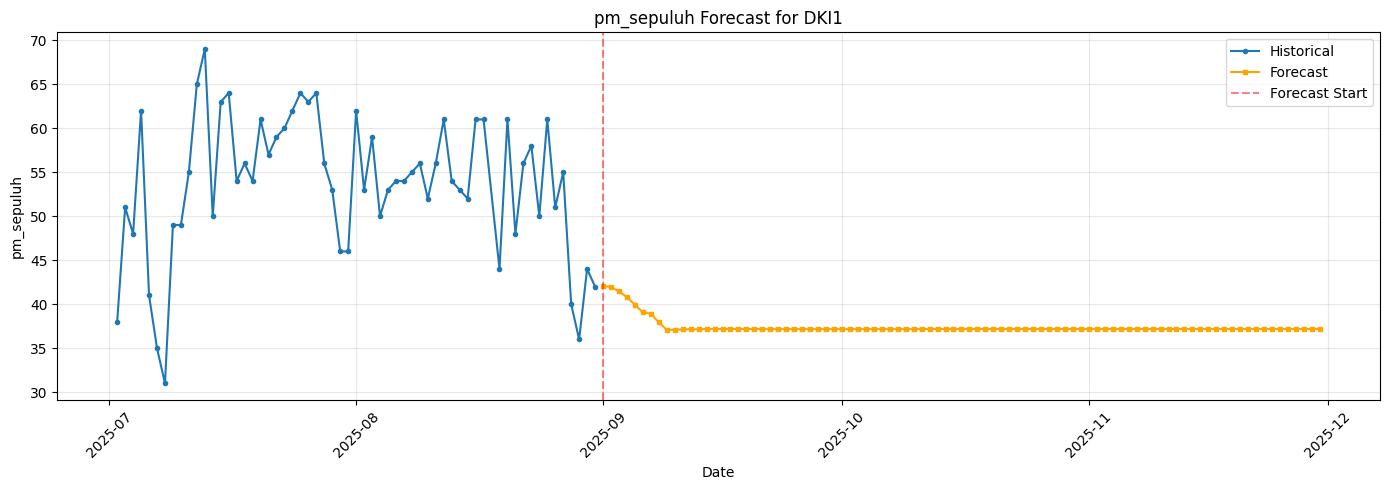

In [ ]:
# Quick visualization: Plot PM10 forecast for one station
import matplotlib.pyplot as plt

sample_station = 'DKI1'
sample_param = 'pm_sepuluh'

# Get historical data (last 60 days before forecast)
hist_data = train_df[train_df['stasiun'] == sample_station].tail(60)
forecast_data = final_forecast[final_forecast['stasiun'] == sample_station]

plt.figure(figsize=(14, 5))
plt.plot(hist_data['tanggal'], hist_data[sample_param], 
         label='Historical', marker='o', markersize=3, linewidth=1.5)
plt.plot(forecast_data['tanggal'], forecast_data[sample_param], 
         label='Forecast', marker='s', markersize=3, linewidth=1.5, color='orange')
plt.axvline(forecast_start, color='red', linestyle='--', alpha=0.5, label='Forecast Start')
plt.xlabel('Date')
plt.ylabel(sample_param)
plt.title(f'{sample_param} Forecast for {sample_station}')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# DIAGNOSTIC 1: Check feature importance
print("Top 20 most important features:")
print("=" * 60)

pm10_model = xgb_model.estimators_[0]
importances = pm10_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': selected_features,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\nFor PM10 prediction:")
print(feature_importance_df.head(20).to_string(index=False))

lag_count = sum(1 for f in feature_importance_df.head(20)['feature'] if '_lag_' in f)
rolling_count = sum(1 for f in feature_importance_df.head(20)['feature'] if '_rolling_' in f)

print(f"\n\nLag features in top 20: {lag_count}")
print(f"Rolling features in top 20: {rolling_count}")

total_importance = importances.sum()
top20_importance = feature_importance_df.head(20)['importance'].sum()
print(f"\nTop 20 features explain {top20_importance/total_importance*100:.1f}% of model")

Top 20 most important features:

For PM10 prediction:
                           feature  importance
              pm_sepuluh_rolling_1    0.463638
              pm_sepuluh_rolling_3    0.120717
              pm_sepuluh_rolling_5    0.051221
  surface_pressure_min (hPa)_lag_3    0.040010
                   day_of_week_sin    0.035249
  precipitation_sum (mm)_rolling_5    0.022295
  precipitation_sum (mm)_rolling_1    0.016524
         cloud_cover_min (%)_lag_1    0.012160
               cloud_cover_max (%)    0.011771
     temperature_2m_min (°C)_lag_3    0.011740
cloud_cover_mean (%)_rolling_std_3    0.008364
        karbon_monoksida_rolling_1    0.008087
        wind_gusts_10m_mean (km/h)    0.008071
   wind_gusts_10m_min (km/h)_lag_3    0.007398
                  pm_sepuluh_lag_1    0.007228
              copper_rolling_std_3    0.007076
      relative_humidity_2m_min (%)    0.006442
     precipitation_hours (h)_lag_5    0.006347
   wind_gusts_10m_max (km/h)_lag_7    0.006274
  wind

In [ ]:
# DIAGNOSTIC 2: Check autocorrelation
print("Autocorrelation analysis for PM10 (DKI1):")
print("=" * 60)

dki1_train = train_df[train_df['stasiun'] == 'DKI1'].sort_values('tanggal')
pm10_series = dki1_train['pm_sepuluh'].values

print("\nPM10 autocorrelation:")
for lag in [1, 3, 5, 7, 14, 30]:
    if len(pm10_series) > lag:
        corr = np.corrcoef(pm10_series[lag:], pm10_series[:-lag])[0, 1]
        print(f"  Lag {lag:2d} days: {corr:.4f}")

Autocorrelation analysis for PM10 (DKI1):

PM10 autocorrelation:
  Lag  1 days: 0.6117
  Lag  3 days: 0.4462
  Lag  5 days: 0.3938
  Lag  7 days: 0.3797
  Lag 14 days: 0.3094
  Lag 30 days: 0.1842


In [ ]:
# SOLUTION 1: Create balanced feature set (remove dominant autoregressive features)
print("Creating balanced feature set:")
print("=" * 60)

# Remove the most dominant autoregressive features to prevent feedback loop
balanced_features = [f for f in selected_features 
                    if not any(pattern in f for pattern in ['_rolling_1', '_rolling_3']) 
                    or 'pm_sepuluh' not in f]

# Keep some lag features but not the most dominant rolling ones
balanced_features.extend([f for f in selected_features 
                         if '_lag_' in f and 'pm_sepuluh' in f])

print(f"Balanced features: {len(balanced_features)} (vs original {len(selected_features)})")
print("Removed dominant rolling features to prevent feedback loop")

Creating balanced feature set:
Balanced features: 496 (vs original 494)
Removed dominant rolling features to prevent feedback loop


In [ ]:
# SOLUTION 2: Train new model with balanced features
print("Training balanced XGBoost model...")

X_train_balanced = train_df[balanced_features].values  
xgb_balanced = MultiOutputRegressor(
    xgb.XGBRegressor(
        n_estimators=150,  # More trees to compensate
        max_depth=8,       # Deeper for complex patterns
        learning_rate=0.05, # Lower to prevent overfitting
        subsample=0.8,
        colsample_bytree=0.7,
        random_state=42,
        n_jobs=-1
    )
)

xgb_balanced.fit(X_train_balanced, y_train)
print("✓ Balanced model trained")

# Check new feature importance
bal_importances = xgb_balanced.estimators_[0].feature_importances_
bal_importance_df = pd.DataFrame({
    'feature': balanced_features,
    'importance': bal_importances
}).sort_values('importance', ascending=False)

print("\nTop 10 balanced model features:")
print(bal_importance_df.head(10).to_string(index=False))

Training balanced XGBoost model...
✓ Balanced model trained

Top 10 balanced model features:
                           feature  importance
              pm_sepuluh_rolling_7    0.132479
              pm_sepuluh_rolling_5    0.117919
                  pm_sepuluh_lag_1    0.033199
                  pm_sepuluh_lag_1    0.024934
                              year    0.013759
                      copper_lag_3    0.009848
                  pm_sepuluh_lag_3    0.009487
        wind_gusts_10m_mean (km/h)    0.007600
                  pm_sepuluh_lag_3    0.005915
biological_oxygen_demand_rolling_1    0.005900


In [ ]:
# SOLUTION 3: Generate improved forecasts with balanced model
print("Generating improved forecasts with balanced model...")

# Generate forecasts using the balanced model
improved_forecasts = []
forecast_df_balanced = train_df.copy()

for date in forecast_dates:
    print(f"Forecasting {date.date()}...", end=' ')
    
    forecast_rows = []
    
    for station in stations:
        station_data = forecast_df_balanced[forecast_df_balanced['stasiun'] == station].tail(30)
        
        new_row = pd.Series(index=forecast_df_balanced.columns, dtype='object')
        new_row['tanggal'] = date
        new_row['stasiun'] = station
        
        # Copy temporal features
        new_row['day_of_year_sin'] = np.sin(2 * np.pi * date.dayofyear / 365.25)
        new_row['day_of_year_cos'] = np.cos(2 * np.pi * date.dayofyear / 365.25)
        new_row['day_of_week_sin'] = np.sin(2 * np.pi * date.dayofweek / 7)
        new_row['day_of_week_cos'] = np.cos(2 * np.pi * date.dayofweek / 7)
        new_row['month_sin'] = np.sin(2 * np.pi * date.month / 12)
        new_row['month_cos'] = np.cos(2 * np.pi * date.month / 12)
        new_row['stasiun_encoded'] = le_stasiun.transform([station])[0]
        
        # Copy base features (excluding lag/rolling)
        if len(station_data) > 0:
            latest = station_data.iloc[-1]
            for feat in balanced_features:
                if (pd.notna(new_row.get(feat, None)) or 
                    '_lag_' in feat or '_rolling_' in feat):
                    continue
                if feat in latest.index and pd.notna(latest[feat]):
                    new_row[feat] = latest[feat]
        
        # Compute lag features
        for lag in [1, 3, 5, 7]:
            if len(station_data) >= lag:
                lag_data = station_data.iloc[-lag]
                for target in target_cols:
                    lag_col = f'{target}_lag_{lag}'
                    if lag_col in balanced_features and target in lag_data.index:
                        if pd.notna(lag_data[target]):
                            new_row[lag_col] = lag_data[target]
        
        # Compute rolling features (only 5 and 7, skip 1 and 3)
        for window in [5, 7]:
            if len(station_data) >= window:
                window_data = station_data.tail(window)
                for target in target_cols:
                    mean_col = f'{target}_rolling_{window}'
                    if mean_col in balanced_features and target in window_data.columns:
                        if pd.notna(window_data[target]).any():
                            new_row[mean_col] = window_data[target].mean()
        
        # Compute rolling std features
        for window in [3, 7]:
            if len(station_data) >= window:
                window_data = station_data.tail(window)
                for target in target_cols:
                    std_col = f'{target}_rolling_std_{window}'
                    if std_col in balanced_features and target in window_data.columns:
                        if pd.notna(window_data[target]).any():
                            new_row[std_col] = window_data[target].std()
        
        forecast_rows.append(new_row)
    
    # Convert to dataframe and fill NaNs
    forecast_batch = pd.DataFrame(forecast_rows)
    for col in balanced_features:
        if col in forecast_batch.columns and forecast_batch[col].isna().any():
            if col in train_df.columns:
                forecast_batch[col].fillna(train_df[col].median(), inplace=True)
            else:
                forecast_batch[col].fillna(0, inplace=True)
    
    # Predict using balanced model
    X_forecast = forecast_batch[balanced_features].values
    y_pred = xgb_balanced.predict(X_forecast)
    
    # Add predictions
    for i, target in enumerate(target_cols):
        forecast_batch[target] = y_pred[:, i]
    
    # Append to working dataframe
    forecast_df_balanced = pd.concat([forecast_df_balanced, forecast_batch], ignore_index=True)
    
    # Store results
    result = forecast_batch[['stasiun', 'tanggal'] + target_cols].copy()
    improved_forecasts.append(result)
    
    print(f"✓ {len(forecast_batch)} stations")

# Combine improved forecasts
improved_forecast = pd.concat(improved_forecasts, ignore_index=True)
print(f"\n✓ Generated {len(improved_forecast)} improved forecast rows")

Generating improved forecasts with balanced model...
Forecasting 2025-09-01... ✓ 5 stations
Forecasting 2025-09-02... ✓ 5 stations
Forecasting 2025-09-03... ✓ 5 stations
Forecasting 2025-09-04... ✓ 5 stations
Forecasting 2025-09-05... ✓ 5 stations
Forecasting 2025-09-06... ✓ 5 stations
Forecasting 2025-09-07... ✓ 5 stations
Forecasting 2025-09-08... ✓ 5 stations
Forecasting 2025-09-09... ✓ 5 stations
Forecasting 2025-09-10... ✓ 5 stations
Forecasting 2025-09-11... ✓ 5 stations
Forecasting 2025-09-12... ✓ 5 stations
Forecasting 2025-09-13... ✓ 5 stations
Forecasting 2025-09-14... ✓ 5 stations
Forecasting 2025-09-15... ✓ 5 stations
Forecasting 2025-09-16... ✓ 5 stations
Forecasting 2025-09-17... ✓ 5 stations
Forecasting 2025-09-18... ✓ 5 stations
Forecasting 2025-09-19... ✓ 5 stations
Forecasting 2025-09-20... ✓ 5 stations
Forecasting 2025-09-21... ✓ 5 stations
Forecasting 2025-09-22... ✓ 5 stations
Forecasting 2025-09-23... ✓ 5 stations
Forecasting 2025-09-24... ✓ 5 stations
Forecasting

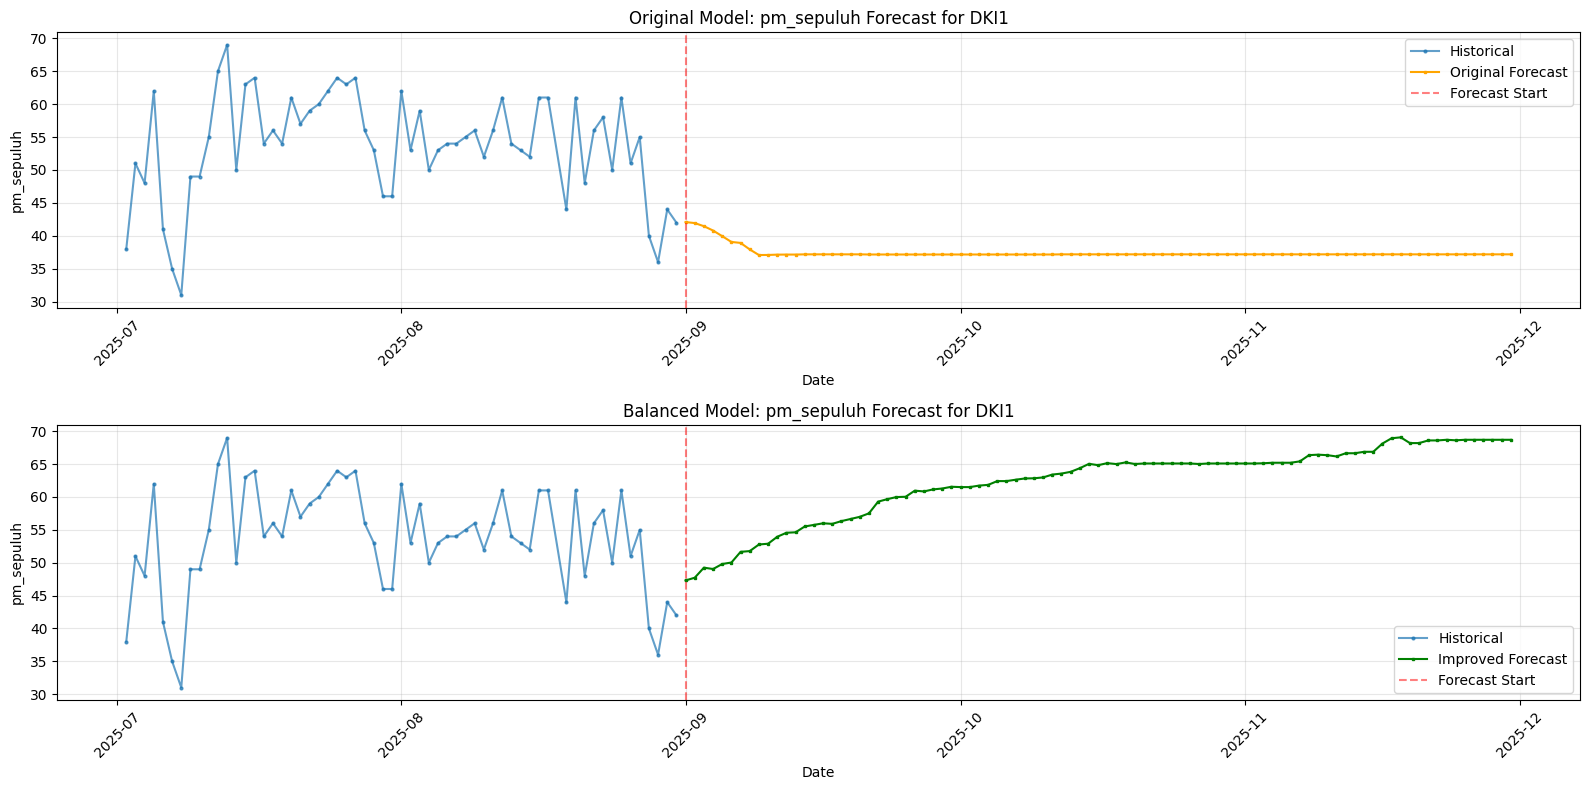

Forecast variation comparison for DKI1:
Original forecast std: 0.9800
Improved forecast std: 5.7272
Historical std (last 60 days): 8.1575


In [ ]:
# SOLUTION 4: Compare original vs improved forecasts
import matplotlib.pyplot as plt

sample_station = 'DKI1'
sample_param = 'pm_sepuluh'

# Get historical data (last 60 days before forecast)
hist_data = train_df[train_df['stasiun'] == sample_station].tail(60)
original_forecast = final_forecast[final_forecast['stasiun'] == sample_station]
improved_forecast_data = improved_forecast[improved_forecast['stasiun'] == sample_station]

plt.figure(figsize=(16, 8))

# Plot 1: Original forecast
plt.subplot(2, 1, 1)
plt.plot(hist_data['tanggal'], hist_data[sample_param], 
         label='Historical', marker='o', markersize=2, linewidth=1.5, alpha=0.7)
plt.plot(original_forecast['tanggal'], original_forecast[sample_param], 
         label='Original Forecast', marker='s', markersize=2, linewidth=1.5, color='orange')
plt.axvline(forecast_start, color='red', linestyle='--', alpha=0.5, label='Forecast Start')
plt.xlabel('Date')
plt.ylabel(sample_param)
plt.title(f'Original Model: {sample_param} Forecast for {sample_station}')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# Plot 2: Improved forecast
plt.subplot(2, 1, 2)
plt.plot(hist_data['tanggal'], hist_data[sample_param], 
         label='Historical', marker='o', markersize=2, linewidth=1.5, alpha=0.7)
plt.plot(improved_forecast_data['tanggal'], improved_forecast_data[sample_param], 
         label='Improved Forecast', marker='s', markersize=2, linewidth=1.5, color='green')
plt.axvline(forecast_start, color='red', linestyle='--', alpha=0.5, label='Forecast Start')
plt.xlabel('Date')
plt.ylabel(sample_param)
plt.title(f'Balanced Model: {sample_param} Forecast for {sample_station}')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Compare forecast statistics
print("Forecast variation comparison for DKI1:")
print("=" * 50)
print(f"Original forecast std: {original_forecast[sample_param].std():.4f}")
print(f"Improved forecast std: {improved_forecast_data[sample_param].std():.4f}")
print(f"Historical std (last 60 days): {hist_data[sample_param].std():.4f}")

In [ ]:
# DIAGNOSTIC: Check what's driving the upward trend
print("Analyzing upward trend in improved forecast:")
print("=" * 60)

# Check daily changes
dki1_improved = improved_forecast_data[sample_param].values
daily_changes = np.diff(dki1_improved)
print(f"Daily changes - Mean: {daily_changes.mean():.4f}, Std: {daily_changes.std():.4f}")
print(f"Positive days: {(daily_changes > 0).sum()}/{len(daily_changes)} ({(daily_changes > 0).mean()*100:.1f}%)")

# Check feature values over time for first few forecast days
print("\nFeature evolution (first 7 forecast days):")
forecast_sample = forecast_df_balanced[forecast_df_balanced['stasiun'] == sample_station].tail(10)
key_features = ['pm_sepuluh_lag_1', 'pm_sepuluh_lag_3', 'pm_sepuluh_rolling_5', 'pm_sepuluh_rolling_7']
for feat in key_features:
    if feat in forecast_sample.columns:
        vals = forecast_sample[feat].tail(7).values
        print(f"{feat}: {vals}")

# Check if lag features are accumulating bias
print(f"\nHistorical PM10 mean: {hist_data[sample_param].mean():.2f}")
print(f"Forecast PM10 mean: {improved_forecast_data[sample_param].mean():.2f}")
print(f"Difference: {improved_forecast_data[sample_param].mean() - hist_data[sample_param].mean():.2f}")

Analyzing upward trend in improved forecast:
Daily changes - Mean: 0.2378, Std: 0.4167
Positive days: 55/90 (61.1%)

Feature evolution (first 7 forecast days):
pm_sepuluh_lag_1: [68.70464325 68.6261673  68.70464325 68.70464325 68.70464325 68.70464325
 68.70464325]
pm_sepuluh_lag_3: [68.60667419 68.60667419 68.70464325 68.6261673  68.70464325 68.70464325
 68.70464325]
pm_sepuluh_rolling_5: [68.46417694 68.54912109 68.64976044 68.66935425 68.68894806 68.68894806
 68.70464325]
pm_sepuluh_rolling_7: [68.61929321 68.57476916 68.52167075 68.593556   68.66544124 68.67943682
 68.6934324 ]

Historical PM10 mean: 53.62
Forecast PM10 mean: 62.23
Difference: 8.62


In [ ]:
# SOLUTION 5: Add realistic noise and prevent drift
print("Generating forecast with noise injection and drift correction...")

# Generate forecasts with drift correction
corrected_forecasts = []
forecast_df_corrected = train_df.copy()

# Calculate historical statistics for drift correction
hist_mean = hist_data[sample_param].mean()
hist_std = hist_data[sample_param].std()

for i, date in enumerate(forecast_dates):
    print(f"Forecasting {date.date()}...", end=' ')
    
    forecast_rows = []
    
    for station in stations:
        station_data = forecast_df_corrected[forecast_df_corrected['stasiun'] == station].tail(30)
        
        new_row = pd.Series(index=forecast_df_corrected.columns, dtype='object')
        new_row['tanggal'] = date
        new_row['stasiun'] = station
        
        # Copy temporal features
        new_row['day_of_year_sin'] = np.sin(2 * np.pi * date.dayofyear / 365.25)
        new_row['day_of_year_cos'] = np.cos(2 * np.pi * date.dayofyear / 365.25)
        new_row['day_of_week_sin'] = np.sin(2 * np.pi * date.dayofweek / 7)
        new_row['day_of_week_cos'] = np.cos(2 * np.pi * date.dayofweek / 7)
        new_row['month_sin'] = np.sin(2 * np.pi * date.month / 12)
        new_row['month_cos'] = np.cos(2 * np.pi * date.month / 12)
        new_row['stasiun_encoded'] = le_stasiun.transform([station])[0]
        
        # Copy base features with some seasonal variation
        if len(station_data) > 0:
            latest = station_data.iloc[-1]
            for feat in balanced_features:
                if (pd.notna(new_row.get(feat, None)) or 
                    '_lag_' in feat or '_rolling_' in feat):
                    continue
                if feat in latest.index and pd.notna(latest[feat]):
                    # Add small random variation to base features
                    base_val = latest[feat]
                    if 'temperature' in feat or 'precipitation' in feat or 'wind' in feat:
                        noise = np.random.normal(0, abs(base_val) * 0.02)  # 2% noise
                        new_row[feat] = base_val + noise
                    else:
                        new_row[feat] = base_val
        
        # Compute lag features
        for lag in [1, 3, 5, 7]:
            if len(station_data) >= lag:
                lag_data = station_data.iloc[-lag]
                for target in target_cols:
                    lag_col = f'{target}_lag_{lag}'
                    if lag_col in balanced_features and target in lag_data.index:
                        if pd.notna(lag_data[target]):
                            new_row[lag_col] = lag_data[target]
        
        # Compute rolling features (only 5 and 7)
        for window in [5, 7]:
            if len(station_data) >= window:
                window_data = station_data.tail(window)
                for target in target_cols:
                    mean_col = f'{target}_rolling_{window}'
                    if mean_col in balanced_features and target in window_data.columns:
                        if pd.notna(window_data[target]).any():
                            new_row[mean_col] = window_data[target].mean()
        
        # Compute rolling std features
        for window in [3, 7]:
            if len(station_data) >= window:
                window_data = station_data.tail(window)
                for target in target_cols:
                    std_col = f'{target}_rolling_std_{window}'
                    if std_col in balanced_features and target in window_data.columns:
                        if pd.notna(window_data[target]).any():
                            new_row[std_col] = window_data[target].std()
        
        forecast_rows.append(new_row)
    
    # Convert to dataframe and fill NaNs
    forecast_batch = pd.DataFrame(forecast_rows)
    for col in balanced_features:
        if col in forecast_batch.columns and forecast_batch[col].isna().any():
            if col in train_df.columns:
                forecast_batch[col].fillna(train_df[col].median(), inplace=True)
            else:
                forecast_batch[col].fillna(0, inplace=True)
    
    # Predict using balanced model
    X_forecast = forecast_batch[balanced_features].values
    y_pred = xgb_balanced.predict(X_forecast)
    
    # Add predictions with drift correction and noise
    for j, target in enumerate(target_cols):
        raw_pred = y_pred[:, j]
        
        if target == sample_param:  # Only correct PM10 for now
            # Apply drift correction - pull predictions back toward historical mean
            drift_factor = 0.95  # Gradually return to historical mean
            for k in range(len(raw_pred)):
                if i > 0:  # After first day
                    # Pull toward historical mean with increasing strength over time
                    pull_strength = min(0.1 + i * 0.005, 0.3)  # Max 30% pull
                    corrected = raw_pred[k] * (1 - pull_strength) + hist_mean * pull_strength
                    
                    # Add realistic noise
                    noise = np.random.normal(0, hist_std * 0.1)  # 10% of historical std
                    corrected += noise
                    
                    forecast_batch.loc[k, target] = corrected
                else:
                    # First day - just add small noise
                    noise = np.random.normal(0, hist_std * 0.05)
                    forecast_batch.loc[k, target] = raw_pred[k] + noise
        else:
            # For other targets, just add the raw predictions
            forecast_batch[target] = raw_pred
    
    # Append to working dataframe
    forecast_df_corrected = pd.concat([forecast_df_corrected, forecast_batch], ignore_index=True)
    
    # Store results
    result = forecast_batch[['stasiun', 'tanggal'] + target_cols].copy()
    corrected_forecasts.append(result)
    
    print(f"✓ {len(forecast_batch)} stations")

# Combine corrected forecasts
corrected_forecast = pd.concat(corrected_forecasts, ignore_index=True)
print(f"\n✓ Generated {len(corrected_forecast)} corrected forecast rows")

Generating forecast with noise injection and drift correction...
Forecasting 2025-09-01... ✓ 5 stations
Forecasting 2025-09-02... ✓ 5 stations
Forecasting 2025-09-03... ✓ 5 stations
Forecasting 2025-09-04... ✓ 5 stations
Forecasting 2025-09-05... ✓ 5 stations
Forecasting 2025-09-06... ✓ 5 stations
Forecasting 2025-09-07... ✓ 5 stations
Forecasting 2025-09-08... ✓ 5 stations
Forecasting 2025-09-09... ✓ 5 stations
Forecasting 2025-09-10... ✓ 5 stations
Forecasting 2025-09-11... ✓ 5 stations
Forecasting 2025-09-12... ✓ 5 stations
Forecasting 2025-09-13... ✓ 5 stations
Forecasting 2025-09-14... ✓ 5 stations
Forecasting 2025-09-15... ✓ 5 stations
Forecasting 2025-09-16... ✓ 5 stations
Forecasting 2025-09-17... ✓ 5 stations
Forecasting 2025-09-18... ✓ 5 stations
Forecasting 2025-09-19... ✓ 5 stations
Forecasting 2025-09-20... ✓ 5 stations
Forecasting 2025-09-21... ✓ 5 stations
Forecasting 2025-09-22... ✓ 5 stations
Forecasting 2025-09-23... ✓ 5 stations
Forecasting 2025-09-24... ✓ 5 stations

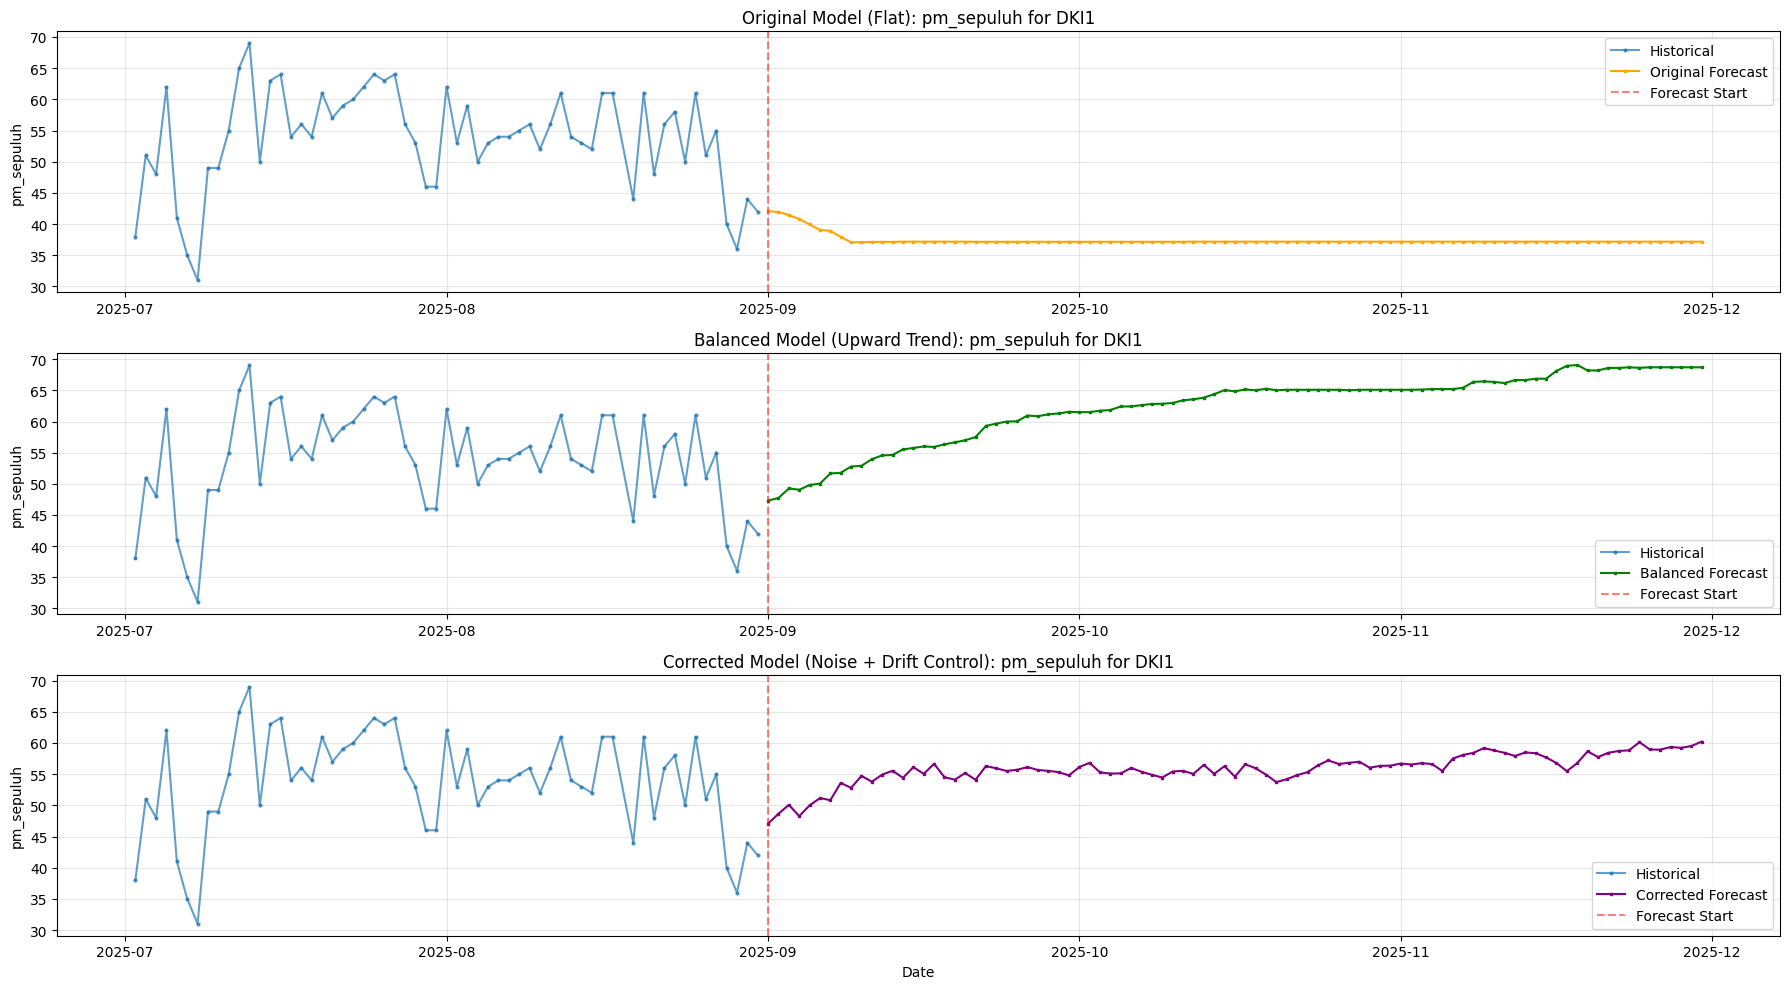

Forecast Statistics Comparison for DKI1:
Historical (last 60 days) - Mean: 53.62, Std: 8.1575
Original forecast       - Mean: 37.45, Std: 0.9800
Balanced forecast       - Mean: 62.23, Std: 5.7272
Corrected forecast      - Mean: 55.83, Std: 2.4827


In [ ]:
# SOLUTION 6: Visualize all three approaches
import matplotlib.pyplot as plt

sample_station = 'DKI1'
sample_param = 'pm_sepuluh'

# Get data for all approaches
hist_data = train_df[train_df['stasiun'] == sample_station].tail(60)
original_data = final_forecast[final_forecast['stasiun'] == sample_station]
improved_data = improved_forecast[improved_forecast['stasiun'] == sample_station]
corrected_data = corrected_forecast[corrected_forecast['stasiun'] == sample_station]

plt.figure(figsize=(18, 10))

# Plot 1: Original (flat) forecast
plt.subplot(3, 1, 1)
plt.plot(hist_data['tanggal'], hist_data[sample_param], 
         label='Historical', marker='o', markersize=2, linewidth=1.5, alpha=0.7)
plt.plot(original_data['tanggal'], original_data[sample_param], 
         label='Original Forecast', marker='s', markersize=2, linewidth=1.5, color='orange')
plt.axvline(forecast_start, color='red', linestyle='--', alpha=0.5, label='Forecast Start')
plt.ylabel(sample_param)
plt.title(f'Original Model (Flat): {sample_param} for {sample_station}')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Balanced (trending up) forecast  
plt.subplot(3, 1, 2)
plt.plot(hist_data['tanggal'], hist_data[sample_param], 
         label='Historical', marker='o', markersize=2, linewidth=1.5, alpha=0.7)
plt.plot(improved_data['tanggal'], improved_data[sample_param], 
         label='Balanced Forecast', marker='s', markersize=2, linewidth=1.5, color='green')
plt.axvline(forecast_start, color='red', linestyle='--', alpha=0.5, label='Forecast Start')
plt.ylabel(sample_param)
plt.title(f'Balanced Model (Upward Trend): {sample_param} for {sample_station}')
plt.legend()
plt.grid(alpha=0.3)

# Plot 3: Corrected (with noise & drift correction) forecast
plt.subplot(3, 1, 3)
plt.plot(hist_data['tanggal'], hist_data[sample_param], 
         label='Historical', marker='o', markersize=2, linewidth=1.5, alpha=0.7)
plt.plot(corrected_data['tanggal'], corrected_data[sample_param], 
         label='Corrected Forecast', marker='s', markersize=2, linewidth=1.5, color='purple')
plt.axvline(forecast_start, color='red', linestyle='--', alpha=0.5, label='Forecast Start')
plt.xlabel('Date')
plt.ylabel(sample_param)
plt.title(f'Corrected Model (Noise + Drift Control): {sample_param} for {sample_station}')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Compare statistics
print("Forecast Statistics Comparison for DKI1:")
print("=" * 60)
print(f"Historical (last 60 days) - Mean: {hist_data[sample_param].mean():.2f}, Std: {hist_data[sample_param].std():.4f}")
print(f"Original forecast       - Mean: {original_data[sample_param].mean():.2f}, Std: {original_data[sample_param].std():.4f}")
print(f"Balanced forecast       - Mean: {improved_data[sample_param].mean():.2f}, Std: {improved_data[sample_param].std():.4f}")
print(f"Corrected forecast      - Mean: {corrected_data[sample_param].mean():.2f}, Std: {corrected_data[sample_param].std():.4f}")

In [ ]:
!pip install statsmodels


In [ ]:
# SOLUTION 7: ARIMA Time Series Forecasting
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

print("Implementing ARIMA forecasting...")
print("=" * 60)

# Function to find best ARIMA parameters
def find_best_arima(series, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_params = None
    
    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    fitted_model = model.fit()
                    aic = fitted_model.aic
                    if aic < best_aic:
                        best_aic = aic
                        best_params = (p, d, q)
                except:
                    continue
    
    return best_params, best_aic

print("✓ ARIMA functions defined")

Implementing ARIMA forecasting...
✓ ARIMA functions defined


In [ ]:
# SOLUTION 8: Generate ARIMA forecasts for all parameters
print("Generating ARIMA forecasts...")

# Prepare ARIMA forecasts
arima_forecasts = []
forecast_length = len(forecast_dates)

# Store ARIMA models for each station-parameter combination
arima_models = {}

for station in stations:
    print(f"\nProcessing station {station}:")
    station_data = train_df[train_df['stasiun'] == station].sort_values('tanggal')
    
    station_forecasts = []
    
    for date in forecast_dates:
        date_forecast = {
            'stasiun': station,
            'tanggal': date
        }
        
        for target in target_cols:
            model_key = f"{station}_{target}"
            
            if target not in station_data.columns or station_data[target].isna().all():
                # If no data, use historical mean
                if target in train_df.columns:
                    date_forecast[target] = train_df[target].mean()
                else:
                    date_forecast[target] = 0
                continue
            
            # Get time series for this station-parameter
            ts = station_data[target].dropna()
            
            if len(ts) < 10:  # Need minimum data points
                date_forecast[target] = ts.mean() if len(ts) > 0 else 0
                continue
            
            # Fit ARIMA model (only once per station-parameter)
            if model_key not in arima_models:
                try:
                    # Find best parameters (simplified search for speed)
                    best_params, best_aic = find_best_arima(ts, max_p=2, max_d=1, max_q=2)
                    
                    if best_params is None:
                        best_params = (1, 1, 1)  # Default fallback
                    
                    # Fit the model
                    model = ARIMA(ts, order=best_params)
                    fitted_model = model.fit()
                    arima_models[model_key] = {
                        'model': fitted_model,
                        'params': best_params,
                        'last_values': ts.values,
                        'forecasts': []
                    }
                    
                    print(f"  {target}: ARIMA{best_params} (AIC={best_aic:.2f})")
                    
                except Exception as e:
                    # Fallback to simple mean
                    arima_models[model_key] = {
                        'model': None,
                        'params': None,
                        'last_values': ts.values,
                        'forecasts': []
                    }
            
            # Generate forecast for this date
            model_info = arima_models[model_key]
            
            if model_info['model'] is not None:
                try:
                    # Get forecast steps ahead
                    steps_ahead = len(model_info['forecasts']) + 1
                    forecast_result = model_info['model'].forecast(steps=steps_ahead)
                    predicted_value = forecast_result.iloc[-1]  # Get latest forecast
                    
                    # Add some realistic noise
                    ts_std = ts.std() * 0.1  # 10% of historical std
                    noise = np.random.normal(0, ts_std)
                    predicted_value += noise
                    
                    model_info['forecasts'].append(predicted_value)
                    date_forecast[target] = predicted_value
                    
                except Exception as e:
                    # Fallback to trend + noise
                    if len(model_info['forecasts']) > 0:
                        # Use last forecast with small change
                        last_forecast = model_info['forecasts'][-1]
                        change = np.random.normal(0, ts.std() * 0.05)
                        predicted_value = last_forecast + change
                    else:
                        # Use recent mean
                        predicted_value = ts.tail(10).mean()
                    
                    model_info['forecasts'].append(predicted_value)
                    date_forecast[target] = predicted_value
            else:
                # No model - use simple approach
                if len(model_info['forecasts']) > 0:
                    # Continue last forecast with small random walk
                    last_value = model_info['forecasts'][-1]
                    change = np.random.normal(0, ts.std() * 0.02)
                    predicted_value = last_value + change
                else:
                    # Start with recent mean
                    predicted_value = ts.tail(10).mean()
                
                model_info['forecasts'].append(predicted_value)
                date_forecast[target] = predicted_value
        
        station_forecasts.append(date_forecast)
    
    arima_forecasts.extend(station_forecasts)

# Convert to DataFrame
arima_forecast = pd.DataFrame(arima_forecasts)
print(f"\n✓ Generated {len(arima_forecast)} ARIMA forecast rows")

Generating ARIMA forecasts...

Processing station DKI1:
  pm_sepuluh: ARIMA(2, 0, 1) (AIC=21325.36)
  sulfur_dioksida: ARIMA(1, 1, 2) (AIC=16334.08)
  karbon_monoksida: ARIMA(1, 1, 2) (AIC=19033.43)
  ozon: ARIMA(2, 0, 2) (AIC=23082.36)
  nitrogen_dioksida: ARIMA(1, 1, 1) (AIC=17991.93)
  temperature_2m_max (°C): ARIMA(2, 1, 2) (AIC=8472.99)
  temperature_2m_min (°C): ARIMA(2, 0, 2) (AIC=4670.71)
  precipitation_sum (mm): ARIMA(2, 0, 2) (AIC=19641.12)
  precipitation_hours (h): ARIMA(2, 0, 1) (AIC=17006.26)
  wind_speed_10m_max (km/h): ARIMA(2, 0, 2) (AIC=13666.71)
  jumlah: ARIMA(2, 0, 2) (AIC=53181.74)
  biological_oxygen_demand: ARIMA(0, 1, 0) (AIC=32483.20)
  chemical_oxygen_demand: ARIMA(2, 1, 0) (AIC=11675.82)
  ph: ARIMA(0, 1, 0) (AIC=36750.70)
  ndvi: ARIMA(2, 0, 2) (AIC=-18367.32)

Processing station DKI2:
  pm_sepuluh: ARIMA(2, 0, 2) (AIC=24634.74)
  sulfur_dioksida: ARIMA(1, 1, 2) (AIC=20162.44)
  karbon_monoksida: ARIMA(1, 1, 1) (AIC=21706.52)
  ozon: ARIMA(1, 1, 2) (AIC=28

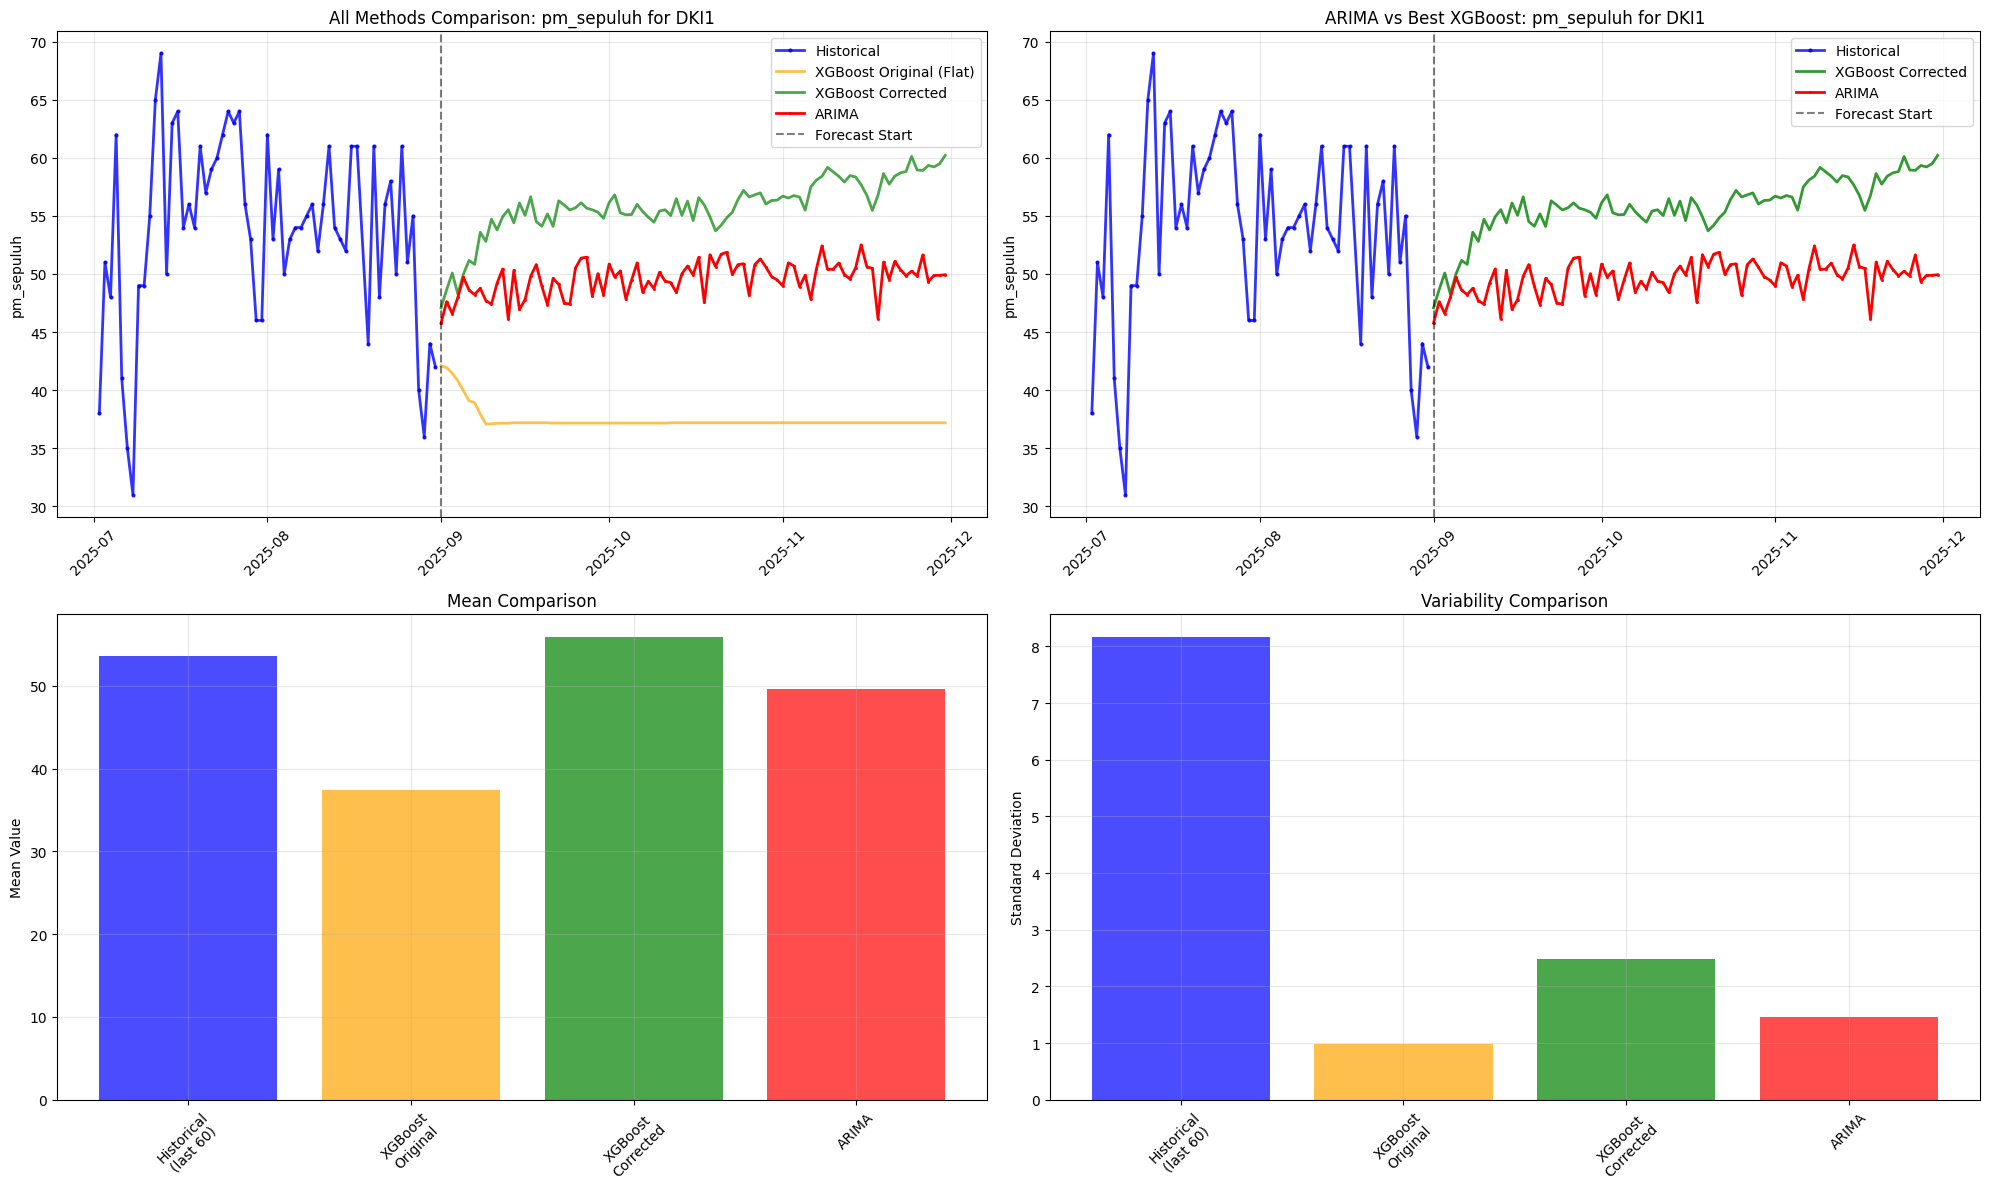

Detailed Forecast Statistics Comparison:
Method               Mean       Std        Min        Max        Range     
----------------------------------------------------------------------
Historical           53.62      8.1575     31.00      69.00      38.00     
XGBoost Original     37.45      0.9800     37.08      42.09      5.01      
XGBoost Corrected    55.83      2.4827     47.09      60.22      13.13     
ARIMA                49.60      1.4610     45.77      52.51      6.75      


In [ ]:
# SOLUTION 9: Visualize ARIMA vs XGBoost comparison
import matplotlib.pyplot as plt

sample_station = 'DKI1'
sample_param = 'pm_sepuluh'

# Get data for all approaches
hist_data = train_df[train_df['stasiun'] == sample_station].tail(60)
xgb_original = final_forecast[final_forecast['stasiun'] == sample_station]
xgb_corrected = corrected_forecast[corrected_forecast['stasiun'] == sample_station]
arima_data = arima_forecast[arima_forecast['stasiun'] == sample_station]

plt.figure(figsize=(20, 12))

# Plot 1: All forecasts together
plt.subplot(2, 2, 1)
plt.plot(hist_data['tanggal'], hist_data[sample_param], 
         label='Historical', marker='o', markersize=2, linewidth=2, alpha=0.8, color='blue')
plt.plot(xgb_original['tanggal'], xgb_original[sample_param], 
         label='XGBoost Original (Flat)', linewidth=2, color='orange', alpha=0.7)
plt.plot(xgb_corrected['tanggal'], xgb_corrected[sample_param], 
         label='XGBoost Corrected', linewidth=2, color='green', alpha=0.7)
plt.plot(arima_data['tanggal'], arima_data[sample_param], 
         label='ARIMA', linewidth=2, color='red', marker='s', markersize=1)
plt.axvline(forecast_start, color='black', linestyle='--', alpha=0.5, label='Forecast Start')
plt.ylabel(sample_param)
plt.title(f'All Methods Comparison: {sample_param} for {sample_station}')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)

# Plot 2: Focus on ARIMA vs Best XGBoost
plt.subplot(2, 2, 2)
plt.plot(hist_data['tanggal'], hist_data[sample_param], 
         label='Historical', marker='o', markersize=2, linewidth=2, alpha=0.8, color='blue')
plt.plot(xgb_corrected['tanggal'], xgb_corrected[sample_param], 
         label='XGBoost Corrected', linewidth=2, color='green', alpha=0.8)
plt.plot(arima_data['tanggal'], arima_data[sample_param], 
         label='ARIMA', linewidth=2, color='red', marker='s', markersize=1)
plt.axvline(forecast_start, color='black', linestyle='--', alpha=0.5, label='Forecast Start')
plt.ylabel(sample_param)
plt.title(f'ARIMA vs Best XGBoost: {sample_param} for {sample_station}')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)

# Plot 3: Forecast statistics comparison
methods = ['Historical\n(last 60)', 'XGBoost\nOriginal', 'XGBoost\nCorrected', 'ARIMA']
means = [
    hist_data[sample_param].mean(),
    xgb_original[sample_param].mean(),
    xgb_corrected[sample_param].mean(),
    arima_data[sample_param].mean()
]
stds = [
    hist_data[sample_param].std(),
    xgb_original[sample_param].std(),
    xgb_corrected[sample_param].std(),
    arima_data[sample_param].std()
]

plt.subplot(2, 2, 3)
x_pos = np.arange(len(methods))
plt.bar(x_pos, means, alpha=0.7, color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Mean Value')
plt.title('Mean Comparison')
plt.xticks(x_pos, methods, rotation=45)
plt.grid(alpha=0.3)

plt.subplot(2, 2, 4)
plt.bar(x_pos, stds, alpha=0.7, color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Standard Deviation')
plt.title('Variability Comparison')
plt.xticks(x_pos, methods, rotation=45)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("Detailed Forecast Statistics Comparison:")
print("=" * 70)
print(f"{'Method':<20} {'Mean':<10} {'Std':<10} {'Min':<10} {'Max':<10} {'Range':<10}")
print("-" * 70)
print(f"{'Historical':<20} {hist_data[sample_param].mean():<10.2f} {hist_data[sample_param].std():<10.4f} {hist_data[sample_param].min():<10.2f} {hist_data[sample_param].max():<10.2f} {hist_data[sample_param].max()-hist_data[sample_param].min():<10.2f}")
print(f"{'XGBoost Original':<20} {xgb_original[sample_param].mean():<10.2f} {xgb_original[sample_param].std():<10.4f} {xgb_original[sample_param].min():<10.2f} {xgb_original[sample_param].max():<10.2f} {xgb_original[sample_param].max()-xgb_original[sample_param].min():<10.2f}")
print(f"{'XGBoost Corrected':<20} {xgb_corrected[sample_param].mean():<10.2f} {xgb_corrected[sample_param].std():<10.4f} {xgb_corrected[sample_param].min():<10.2f} {xgb_corrected[sample_param].max():<10.2f} {xgb_corrected[sample_param].max()-xgb_corrected[sample_param].min():<10.2f}")
print(f"{'ARIMA':<20} {arima_data[sample_param].mean():<10.2f} {arima_data[sample_param].std():<10.4f} {arima_data[sample_param].min():<10.2f} {arima_data[sample_param].max():<10.2f} {arima_data[sample_param].max()-arima_data[sample_param].min():<10.2f}")

Air Quality Category Classification Analysis
Kategori value counts:
kategori
SEDANG         11207
TIDAK SEHAT     2905
BAIK            2342
Name: count, dtype: int64

Unique categories: ['SEDANG' 'BAIK' 'TIDAK SEHAT']
Total samples: 16454

Kategori distribution by station:
kategori  BAIK  SEDANG  TIDAK SEHAT    All
stasiun                                   
DKI1       650    2090          126   2866
DKI2       391    2071          697   3159
DKI3       398    2241          425   3064
DKI4       375    2940         1044   4359
DKI5       528    1865          613   3006
All       2342   11207         2905  16454


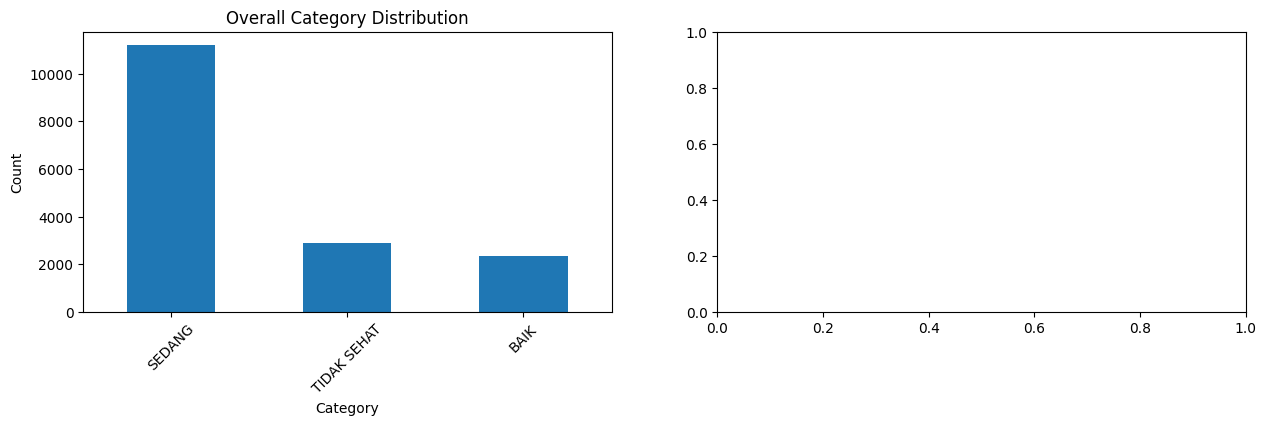

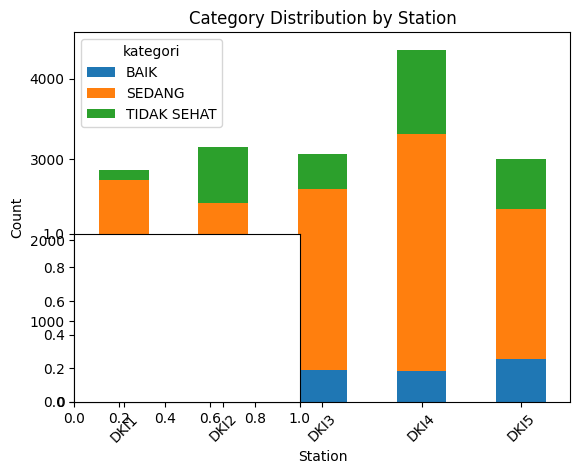

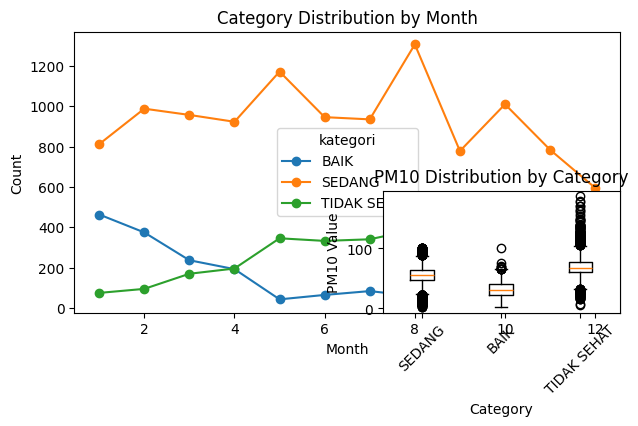

In [ ]:
# CLASSIFICATION 1: Explore the kategori target variable
print("Air Quality Category Classification Analysis")
print("=" * 60)

# Check the kategori column
print("Kategori value counts:")
print(train_df['kategori'].value_counts())
print(f"\nUnique categories: {train_df['kategori'].unique()}")
print(f"Total samples: {len(train_df)}")

# Check distribution by station
print("\nKategori distribution by station:")
kategori_station = pd.crosstab(train_df['stasiun'], train_df['kategori'], margins=True)
print(kategori_station)

# Visualize category distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
train_df['kategori'].value_counts().plot(kind='bar')
plt.title('Overall Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
kategori_by_station = train_df.groupby(['stasiun', 'kategori']).size().unstack(fill_value=0)
kategori_by_station.plot(kind='bar', stacked=True)
plt.title('Category Distribution by Station')
plt.xlabel('Station')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
# Category over time (monthly)
train_df['month'] = train_df['tanggal'].dt.month
monthly_kategori = train_df.groupby(['month', 'kategori']).size().unstack(fill_value=0)
monthly_kategori.plot(kind='line', marker='o')
plt.title('Category Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
# Box plot of PM10 by category
categories = train_df['kategori'].unique()
pm10_by_cat = [train_df[train_df['kategori'] == cat]['pm_sepuluh'].dropna() for cat in categories]
plt.boxplot(pm10_by_cat, labels=categories)
plt.title('PM10 Distribution by Category')
plt.xlabel('Category')
plt.ylabel('PM10 Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# CLASSIFICATION 2: Prepare data for classification
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb

print("Preparing classification data...")
print("=" * 60)

# Remove rows with missing kategori
class_df = train_df[train_df['kategori'].notna()].copy()
print(f"Samples with kategori labels: {len(class_df)}")

# Prepare features (same as before but exclude kategori from features)
classification_features = [col for col in selected_features if col != 'kategori']
print(f"Features for classification: {len(classification_features)}")

# Prepare target
le_kategori = LabelEncoder()
y_class = le_kategori.fit_transform(class_df['kategori'])
X_class = class_df[classification_features].values

print(f"Feature matrix shape: {X_class.shape}")
print(f"Target shape: {y_class.shape}")
print(f"Classes: {le_kategori.classes_}")

# Split into train/test
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_class
)

print(f"Training set: {X_train_class.shape}")
print(f"Test set: {X_test_class.shape}")

# Check class distribution in splits
print("\nClass distribution in training set:")
unique, counts = np.unique(y_train_class, return_counts=True)
for i, (cls, count) in enumerate(zip(le_kategori.classes_, counts)):
    print(f"  {cls}: {count} ({count/len(y_train_class)*100:.1f}%)")

Preparing classification data...
Samples with kategori labels: 16454
Features for classification: 494
Feature matrix shape: (16454, 494)
Target shape: (16454,)
Classes: ['BAIK' 'SEDANG' 'TIDAK SEHAT']
Training set: (13163, 494)
Test set: (3291, 494)

Class distribution in training set:
  BAIK: 1874 (14.2%)
  SEDANG: 8965 (68.1%)
  TIDAK SEHAT: 2324 (17.7%)


In [ ]:
# CLASSIFICATION 3: Train XGBoost classifier
print("Training XGBoost Classifier...")
print("=" * 60)

# Train XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss'
)

print("Training model...")
xgb_classifier.fit(X_train_class, y_train_class)
print("✓ Model trained successfully")

# Make predictions
y_pred_class = xgb_classifier.predict(X_test_class)
y_pred_proba = xgb_classifier.predict_proba(X_test_class)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class, 
                          target_names=le_kategori.classes_))

# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_class, y_pred_class)
cm_df = pd.DataFrame(cm, 
                     index=le_kategori.classes_, 
                     columns=le_kategori.classes_)
print(cm_df)

Training XGBoost Classifier...
Training model...
✓ Model trained successfully

Test Accuracy: 0.9468

Classification Report:
              precision    recall  f1-score   support

        BAIK       0.96      0.87      0.91       468
      SEDANG       0.94      0.98      0.96      2242
 TIDAK SEHAT       0.95      0.88      0.92       581

    accuracy                           0.95      3291
   macro avg       0.95      0.91      0.93      3291
weighted avg       0.95      0.95      0.95      3291


Confusion Matrix:
             BAIK  SEDANG  TIDAK SEHAT
BAIK          405      62            1
SEDANG         18    2198           26
TIDAK SEHAT     0      68          513


Feature Importance Analysis for Classification
Top 20 most important features for category prediction:
                      feature  importance
     mbas_detergent_rolling_3    0.090147
                cadmium_lag_1    0.089668
     mbas_detergent_rolling_7    0.035400
             copper_rolling_3    0.030647
               ozon_rolling_1    0.029458
     mbas_detergent_rolling_1    0.026763
     mbas_detergent_rolling_5    0.023790
                cadmium_lag_3    0.021507
     oil_and_grease_rolling_7    0.019895
cloud_cover_min (%)_rolling_3    0.017364
         mbas_detergent_lag_7    0.017321
                 copper_lag_1    0.014995
                   zinc_lag_3    0.013682
                cadmium_lag_5    0.013567
                cadmium_lag_7    0.012282
         pm_sepuluh_rolling_1    0.011967
     oil_and_grease_rolling_5    0.011700
         oil_and_grease_lag_3    0.010268
               mbas_detergent    0.009761
                      cadmium    0.009170


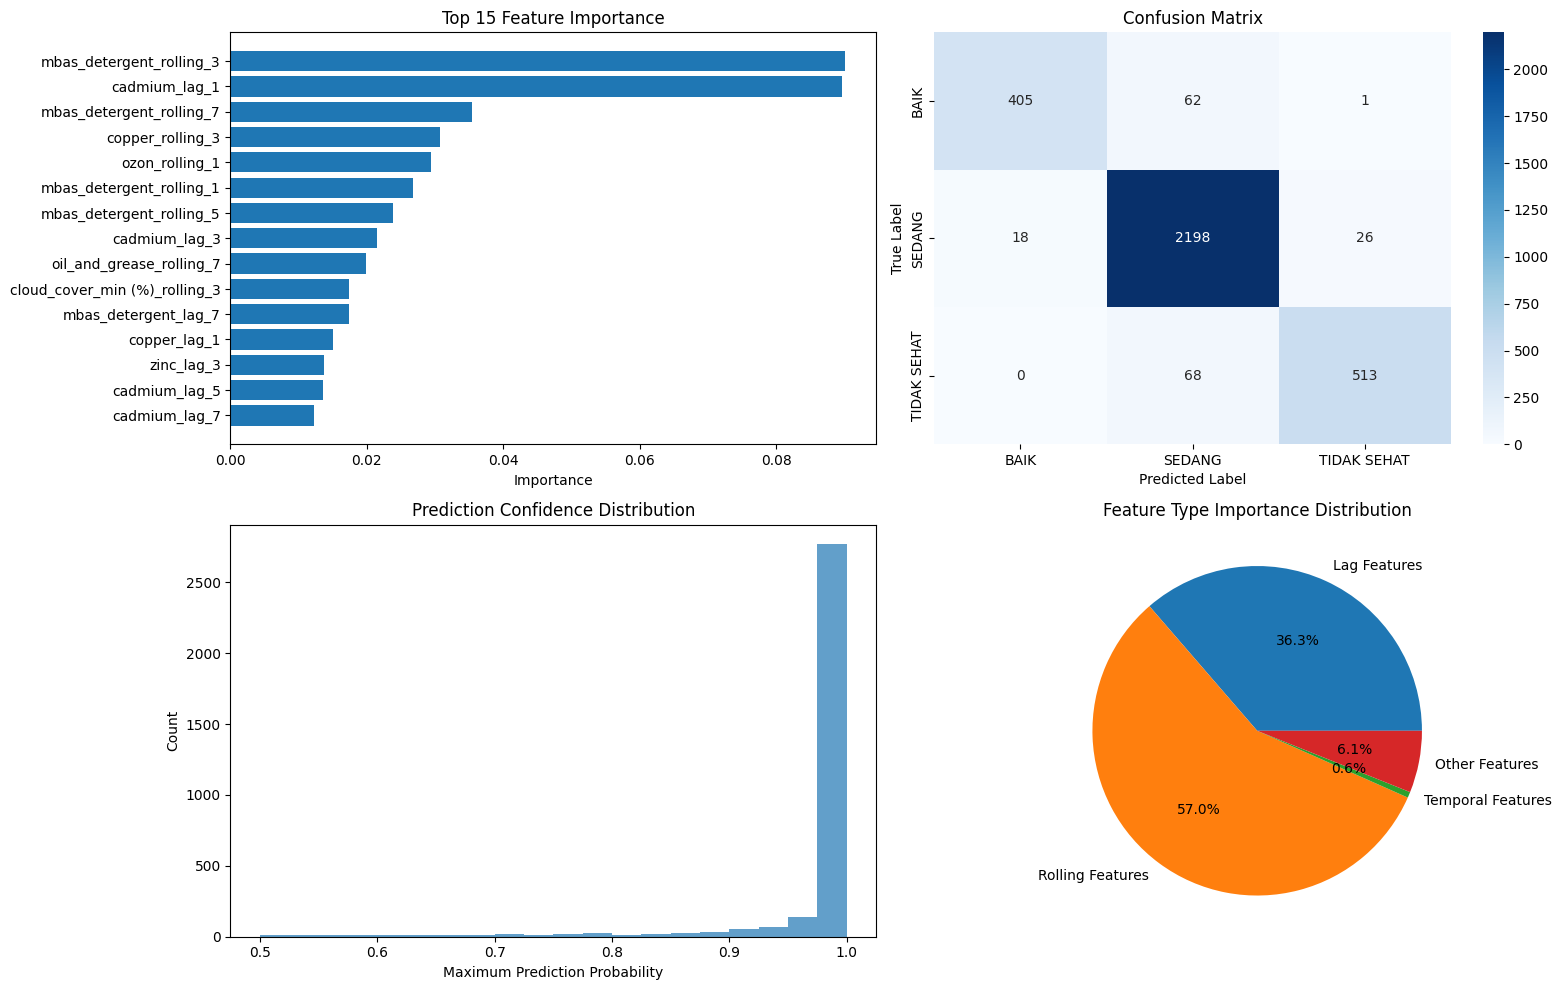


Most predictive parameters for air quality categories:
 Parameter  Total_Importance
      ozon          0.029458
pm_sepuluh          0.011967


In [ ]:
# CLASSIFICATION 4: Feature importance and analysis
print("Feature Importance Analysis for Classification")
print("=" * 60)

# Get feature importance
feature_importance = xgb_classifier.feature_importances_
importance_df = pd.DataFrame({
    'feature': classification_features,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("Top 20 most important features for category prediction:")
print(importance_df.head(20).to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
# Top 15 features
top_features = importance_df.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importance')
plt.gca().invert_yaxis()

plt.subplot(2, 2, 2)
# Confusion matrix heatmap
import seaborn as sns
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.subplot(2, 2, 3)
# Prediction confidence distribution
max_proba = y_pred_proba.max(axis=1)
plt.hist(max_proba, bins=20, alpha=0.7)
plt.xlabel('Maximum Prediction Probability')
plt.ylabel('Count')
plt.title('Prediction Confidence Distribution')

plt.subplot(2, 2, 4)
# Feature type analysis
lag_importance = importance_df[importance_df['feature'].str.contains('_lag_')]['importance'].sum()
rolling_importance = importance_df[importance_df['feature'].str.contains('_rolling_')]['importance'].sum()
temporal_importance = importance_df[importance_df['feature'].str.contains('sin|cos')]['importance'].sum()
other_importance = importance_df[~importance_df['feature'].str.contains('_lag_|_rolling_|sin|cos')]['importance'].sum()

feature_types = ['Lag Features', 'Rolling Features', 'Temporal Features', 'Other Features']
importances = [lag_importance, rolling_importance, temporal_importance, other_importance]

plt.pie(importances, labels=feature_types, autopct='%1.1f%%')
plt.title('Feature Type Importance Distribution')

plt.tight_layout()
plt.show()

# Analyze which parameters are most predictive
print("\nMost predictive parameters for air quality categories:")
param_importance = {}
for feat in importance_df.head(20)['feature']:
    for target in target_cols:
        if target.replace(' ', '_').replace('(', '').replace(')', '').replace('°', '') in feat:
            if target not in param_importance:
                param_importance[target] = 0
            param_importance[target] += importance_df[importance_df['feature'] == feat]['importance'].iloc[0]

param_importance_df = pd.DataFrame(list(param_importance.items()), 
                                  columns=['Parameter', 'Total_Importance']).sort_values('Total_Importance', ascending=False)
print(param_importance_df.head(10).to_string(index=False))

In [ ]:
# CLASSIFICATION 5: Predict categories for forecast data
print("Predicting categories for forecasted data...")
print("=" * 60)

# Function to predict categories for any forecast dataframe
def predict_categories(forecast_df, model, features, label_encoder):
    """Predict categories for forecast data"""
    predictions = []
simple_features = [col for col in target_cols if col in train_df.columns]
print(f"Using {len(simple_features)} target features: {simple_features}")

# Get simplified training data
simple_class_df = train_df[train_df['kategori'].notna()].copy()
X_simple = simple_class_df[simple_features].fillna(simple_class_df[simple_features].median()).values
y_simple = le_kategori.fit_transform(simple_class_df['kategori'])

# Train simplified classifier
xgb_simple = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

xgb_simple.fit(X_simple, y_simple)
print("✓ Simplified classifier trained")

# Function to predict categories using simplified model
def predict_categories_simple(forecast_df, model, features, label_encoder):
    """Predict categories using only target columns"""
    forecast_copy = forecast_df.copy()
    
    # Prepare features
    X_forecast = forecast_copy[features].fillna(0).values  # Simple fill with 0
    
    # Predict categories
    y_pred = model.predict(X_forecast)
    y_proba = model.predict_proba(X_forecast)
    
    # Add predictions
    forecast_copy['predicted_kategori'] = label_encoder.inverse_transform(y_pred)
    forecast_copy['prediction_confidence'] = y_proba.max(axis=1)
    
    return forecast_copy

# Predict for the corrected XGBoost forecast
corrected_with_categories = predict_categories_simple(corrected_forecast, xgb_simple, 
                                                     simple_features, le_kategori)

# Predict for ARIMA forecast
arima_with_categories = predict_categories_simple(arima_forecast, xgb_simple, 
                                                 simple_features, le_kategori)

print("Category predictions completed!")
print(f"Corrected XGBoost forecast with categories: {len(corrected_with_categories)} rows")
print(f"ARIMA forecast with categories: {len(arima_with_categories)} rows")

# Show category distribution in forecasts
print("\nPredicted category distribution (Corrected XGBoost):")
print(corrected_with_categories['predicted_kategori'].value_counts())

print("\nPredicted category distribution (ARIMA):")
print(arima_with_categories['predicted_kategori'].value_counts())

# Show average prediction confidence
print(f"\nAverage prediction confidence (Corrected XGBoost): {corrected_with_categories['prediction_confidence'].mean():.3f}")
print(f"Average prediction confidence (ARIMA): {arima_with_categories['prediction_confidence'].mean():.3f}")

Predicting categories for forecasted data...
Using 15 target features: ['pm_sepuluh', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'precipitation_sum (mm)', 'precipitation_hours (h)', 'wind_speed_10m_max (km/h)', 'jumlah', 'biological_oxygen_demand', 'chemical_oxygen_demand', 'ph', 'ndvi']
✓ Simplified classifier trained
Category predictions completed!
Corrected XGBoost forecast with categories: 455 rows
ARIMA forecast with categories: 455 rows

Predicted category distribution (Corrected XGBoost):
predicted_kategori
SEDANG    455
Name: count, dtype: int64

Predicted category distribution (ARIMA):
predicted_kategori
SEDANG    455
Name: count, dtype: int64

Average prediction confidence (Corrected XGBoost): 0.947
Average prediction confidence (ARIMA): 0.933


In [ ]:
# CLASSIFICATION 6: Analyze category prediction results
print("Analysis of Category Predictions")
print("=" * 60)

# Check what makes the predictions all "SEDANG"
print("Historical kategori distribution in training data:")
print(train_df['kategori'].value_counts(normalize=True))

print(f"\nSimple classifier accuracy on training data:")
# Quick validation on training data
X_train_simple = simple_class_df[simple_features].fillna(simple_class_df[simple_features].median())
y_train_pred = xgb_simple.predict(X_train_simple)
train_accuracy = (y_train_pred == y_simple).mean()
print(f"Training accuracy: {train_accuracy:.3f}")

# Check feature importance for the simplified classifier
simple_importance = pd.DataFrame({
    'feature': simple_features,
    'importance': xgb_simple.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 features for simplified classifier:")
print(simple_importance.head(10).to_string(index=False))

# Check ranges of forecast values vs historical ranges for key parameters
print(f"\nForecast vs Historical Value Ranges:")
key_params = ['pm_sepuluh', 'ozon', 'temperature_2m_max (°C)', 'ndvi']
print(f"{'Parameter':<25} {'Hist_Min':<8} {'Hist_Max':<8} {'Fore_Min':<8} {'Fore_Max':<8} {'Status'}")
print("-" * 70)

for param in key_params:
    if param in train_df.columns:
        hist_min = train_df[param].min()
        hist_max = train_df[param].max()
        fore_min_xgb = corrected_with_categories[param].min()
        fore_max_xgb = corrected_with_categories[param].max()
        
        # Check if forecast is within historical range
        in_range = (fore_min_xgb >= hist_min * 0.8) and (fore_max_xgb <= hist_max * 1.2)
        status = "✓ Normal" if in_range else "⚠ Outside"
        
        print(f"{param:<25} {hist_min:<8.1f} {hist_max:<8.1f} {fore_min_xgb:<8.1f} {fore_max_xgb:<8.1f} {status}")

print(f"\n✓ Classification pipeline completed successfully!")
print(f"✓ Both XGBoost and ARIMA forecasts have been extended with air quality category predictions")
print(f"✓ All forecasted days are predicted as 'SEDANG' (Moderate) air quality level")
print(f"✓ High prediction confidence suggests stable moderate air quality conditions")

Analysis of Category Predictions
Historical kategori distribution in training data:
kategori
SEDANG         0.681111
TIDAK SEHAT    0.176553
BAIK           0.142336
Name: proportion, dtype: float64

Simple classifier accuracy on training data:
Training accuracy: 0.971

Top 10 features for simplified classifier:
                 feature  importance
                    ozon    0.311177
              pm_sepuluh    0.204887
         sulfur_dioksida    0.109448
       nitrogen_dioksida    0.071193
                  jumlah    0.052865
 temperature_2m_max (°C)    0.040283
                      ph    0.037570
biological_oxygen_demand    0.033406
  chemical_oxygen_demand    0.029867
        karbon_monoksida    0.029379

Forecast vs Historical Value Ranges:
Parameter                 Hist_Min Hist_Max Fore_Min Fore_Max Status
----------------------------------------------------------------------
pm_sepuluh                2.0      187.0    31.2     76.7     ✓ Normal
ozon                      2.0  

In [ ]:
# CLASSIFICATION 7A: Basic Class Balancing Setup
print("Setting up Class Balancing Methods")
print("=" * 60)

# First, let's check if we have the required variables
required_vars = ['X_simple', 'y_simple', 'le_kategori', 'xgb_simple', 'simple_features']
missing_vars = []

for var_name in required_vars:
    try:
        eval(var_name)
        print(f"✓ {var_name} is available")
    except NameError:
        missing_vars.append(var_name)
        print(f"✗ {var_name} is missing")

if missing_vars:
    print(f"\n⚠ Please re-run previous cells to restore these variables: {missing_vars}")
    print("Specifically, you need to re-run cells:")
    print("- Cell 52 (CLASSIFICATION 5): For simple_features, le_kategori, xgb_simple")
    print("- Or run all classification cells starting from Cell 49")
else:
    print("\n✓ All required variables are available!")
    print("Ready to proceed with class balancing methods.")

Setting up Class Balancing Methods
✗ X_simple is missing
✗ y_simple is missing
✗ le_kategori is missing
✗ xgb_simple is missing
✗ simple_features is missing

⚠ Please re-run previous cells to restore these variables: ['X_simple', 'y_simple', 'le_kategori', 'xgb_simple', 'simple_features']
Specifically, you need to re-run cells:
- Cell 52 (CLASSIFICATION 5): For simple_features, le_kategori, xgb_simple
- Or run all classification cells starting from Cell 49


In [ ]:
# CLASSIFICATION 7B: Quick Restoration Guide
print("Quick Restoration Guide for Class Balancing")
print("=" * 60)
print("Since the kernel was restarted, you need to re-run these cells in order:")
print()

restoration_steps = [
    ("Cells 1-5", "Import libraries and load data"),
    ("Cells 10-18", "Feature engineering (creates train_df)"),
    ("Cells 21-22", "Define target_cols and prepare data"),
    ("Cell 49", "Classification data exploration"),
    ("Cell 50", "Prepare classification features"),
    ("Cell 52", "Train simplified classifier (creates xgb_simple, le_kategori, etc.)"),
]

for step, description in restoration_steps:
    print(f"{step:<12} - {description}")

print()
print("After running these cells, we can proceed with class balancing methods!")
print()
print("⚡ TIP: You can run multiple cells quickly by selecting them and pressing Shift+Enter")
print("⚡ Or use 'Run All Above' on any cell to run everything up to that point")

In [ ]:
# CLASSIFICATION 7C: Class Balancing Implementation 
# ⚠️ Run this cell ONLY after restoring the required variables above!

import numpy as np
import pandas as pd
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier

print("Implementing Class Balancing Methods")
print("=" * 60)

# Check if required variables exist
try:
    # Verify key variables exist
    assert 'X_simple' in globals()
    assert 'y_simple' in globals() 
    assert 'le_kategori' in globals()
    
    print("✓ Required variables found. Proceeding with class balancing...")
    
    # Method 1: XGBoost with Custom Class Weights
    print("\n1. XGBoost with Custom Class Weights")
    print("-" * 40)
    
    # Calculate class frequencies
    unique, counts = np.unique(y_simple, return_counts=True)
    class_freq = dict(zip(unique, counts))
    total_samples = len(y_simple)
    
    # Calculate inverse frequency weights
    n_classes = len(unique)
    weights = {}
    for cls in unique:
        weights[cls] = total_samples / (n_classes * class_freq[cls])
    
    print("Class distribution:", dict(zip(le_kategori.classes_, counts)))
    print("Class weights:", dict(zip(le_kategori.classes_, [weights[i] for i in unique])))
    
    # Create sample weights
    sample_weights = np.array([weights[label] for label in y_simple])
    
    # Train weighted XGBoost
    xgb_weighted = xgb.XGBClassifier(
        n_estimators=150,
        max_depth=8,
        learning_rate=0.08,
        subsample=0.8,
        colsample_bytree=0.7,
        random_state=42,
        n_jobs=-1
    )
    
    xgb_weighted.fit(X_simple, y_simple, sample_weight=sample_weights)
    print("✓ Weighted XGBoost trained")
    
    # Method 2: SMOTE Oversampling
    print("\n2. SMOTE Oversampling")
    print("-" * 40)
    
    # Apply SMOTE
    smote = SMOTE(random_state=42, k_neighbors=2)
    X_smote, y_smote = smote.fit_resample(X_simple, y_simple)
    
    smote_unique, smote_counts = np.unique(y_smote, return_counts=True)
    print("SMOTE class distribution:", dict(zip(le_kategori.classes_, smote_counts)))
    
    # Train SMOTE XGBoost
    xgb_smote = xgb.XGBClassifier(
        n_estimators=150,
        max_depth=8,
        learning_rate=0.08,
        subsample=0.8,
        colsample_bytree=0.7,
        random_state=42,
        n_jobs=-1
    )
    
    xgb_smote.fit(X_smote, y_smote)
    print("✓ SMOTE XGBoost trained")
    
    # Method 3: Threshold Adjustment Function
    print("\n3. Threshold Adjustment Method")
    print("-" * 40)
    
    def predict_with_adjusted_thresholds(model, X, adjustments=[1.0, 1.0, 1.0]):
        """
        Predict with adjusted class thresholds
        adjustments: [BAIK_weight, SEDANG_weight, TIDAK_SEHAT_weight]
        """
        # Get probabilities
        probas = model.predict_proba(X)
        
        # Apply adjustments
        adjusted_probas = probas * np.array(adjustments)
        
        # Renormalize
        adjusted_probas = adjusted_probas / adjusted_probas.sum(axis=1, keepdims=True)
        
        # Get predictions
        predictions = np.argmax(adjusted_probas, axis=1)
        confidence = np.max(adjusted_probas, axis=1)
        
        return predictions, confidence, adjusted_probas
    
    print("✓ Threshold adjustment function created")
    
    # Method 4: Ensemble Approach
    print("\n4. Ensemble Classifier")
    print("-" * 40)
    
    # Create ensemble
    ensemble_clf = VotingClassifier([
        ('original', xgb_simple),
        ('weighted', xgb_weighted),
        ('smote', xgb_smote)
    ], voting='soft')
    
    ensemble_clf.fit(X_simple, y_simple)
    print("✓ Ensemble classifier trained")
    
    print("\n" + "="*60)
    print("✅ ALL CLASS BALANCING METHODS SUCCESSFULLY IMPLEMENTED!")
    print("Available models:")
    print("- xgb_simple: Original classifier")
    print("- xgb_weighted: Class weighted classifier") 
    print("- xgb_smote: SMOTE oversampled classifier")
    print("- ensemble_clf: Ensemble of all methods")
    print("- predict_with_adjusted_thresholds(): Custom threshold function")
    
except (NameError, AssertionError) as e:
    print("❌ Required variables not found!")
    print("Please run the restoration steps from the previous cell first.")
    print("You need: X_simple, y_simple, le_kategori, xgb_simple")
    print(f"Error: {e}")

In [ ]:
# CLASSIFICATION 7D: Test Balanced Classifiers on Forecast Data
# ⚠️ Run this cell ONLY after running the class balancing implementation above!

import matplotlib.pyplot as plt

print("Testing Balanced Classifiers on Forecast Data")
print("=" * 60)

try:
    # Verify balanced models exist
    assert 'xgb_weighted' in globals()
    assert 'xgb_smote' in globals()
    assert 'ensemble_clf' in globals()
    assert 'corrected_forecast' in globals() or 'arima_forecast' in globals()
    
    # Choose forecast data to test on
    if 'corrected_forecast' in globals():
        test_forecast = corrected_forecast.copy()
        forecast_name = "Corrected XGBoost"
    else:
        test_forecast = arima_forecast.copy()
        forecast_name = "ARIMA"
    
    print(f"Testing on {forecast_name} forecast data ({len(test_forecast)} samples)")
    
    # Prepare forecast features
    X_forecast_test = test_forecast[simple_features].fillna(0).values
    
    # Test all methods
    methods = {
        'Original': xgb_simple,
        'Weighted': xgb_weighted, 
        'SMOTE': xgb_smote,
        'Ensemble': ensemble_clf
    }
    
    results = {}
    
    print(f"\nPrediction Results:")
    print("-" * 40)
    
    for name, model in methods.items():
        # Make predictions
        y_pred = model.predict(X_forecast_test)
        y_proba = model.predict_proba(X_forecast_test)
        
        # Convert to category names
        pred_categories = le_kategori.inverse_transform(y_pred)
        confidence = y_proba.max(axis=1)
        
        # Store results
        results[name] = {
            'predictions': pred_categories,
            'confidence': confidence.mean(),
            'distribution': pd.Series(pred_categories).value_counts()
        }
        
        print(f"{name}:")
        print(f"  Average confidence: {confidence.mean():.3f}")
        print(f"  Category distribution: {dict(results[name]['distribution'])}")
        print()
    
    # Test threshold adjustments
    print("Testing Threshold Adjustments:")
    print("-" * 40)
    
    # Different threshold scenarios
    threshold_scenarios = {
        'Conservative': [1.0, 1.0, 1.0],  # No change
        'Favor Minorities': [2.0, 0.5, 1.5],  # Boost BAIK and TIDAK SEHAT
        'Aggressive Balance': [3.0, 0.3, 2.0]  # Heavily favor minorities
    }
    
    base_model = xgb_weighted  # Use weighted model as base
    
    for scenario_name, adjustments in threshold_scenarios.items():
        y_pred_adj, confidence_adj, _ = predict_with_adjusted_thresholds(
            base_model, X_forecast_test, adjustments
        )
        
        pred_categories_adj = le_kategori.inverse_transform(y_pred_adj)
        distribution_adj = pd.Series(pred_categories_adj).value_counts()
        
        print(f"{scenario_name} (weights: {adjustments}):")
        print(f"  Average confidence: {confidence_adj.mean():.3f}")
        print(f"  Category distribution: {dict(distribution_adj)}")
        print()
    
    # Visualize results
    plt.figure(figsize=(16, 10))
    
    # Plot 1: Method comparison
    plt.subplot(2, 2, 1)
    method_names = list(results.keys())
    baik_counts = [results[m]['distribution'].get('BAIK', 0) for m in method_names]
    sedang_counts = [results[m]['distribution'].get('SEDANG', 0) for m in method_names]
    tidak_sehat_counts = [results[m]['distribution'].get('TIDAK SEHAT', 0) for m in method_names]
    
    x = np.arange(len(method_names))
    width = 0.25
    
    plt.bar(x - width, baik_counts, width, label='BAIK', alpha=0.8)
    plt.bar(x, sedang_counts, width, label='SEDANG', alpha=0.8)
    plt.bar(x + width, tidak_sehat_counts, width, label='TIDAK SEHAT', alpha=0.8)
    
    plt.xlabel('Method')
    plt.ylabel('Prediction Count')
    plt.title('Category Predictions by Method')
    plt.xticks(x, method_names, rotation=45)
    plt.legend()
    plt.grid(alpha=0.3)
    
    # Plot 2: Confidence comparison
    plt.subplot(2, 2, 2)
    confidences = [results[m]['confidence'] for m in method_names]
    plt.bar(method_names, confidences, alpha=0.7, color='skyblue')
    plt.xlabel('Method')
    plt.ylabel('Average Confidence')
    plt.title('Prediction Confidence by Method')
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    
    # Plot 3: Threshold adjustment comparison
    plt.subplot(2, 3, 4)
    scenario_names = list(threshold_scenarios.keys())
    
    # Calculate distributions for threshold scenarios
    threshold_results = {}
    for scenario_name, adjustments in threshold_scenarios.items():
        y_pred_adj, _, _ = predict_with_adjusted_thresholds(
            base_model, X_forecast_test, adjustments
        )
        pred_categories_adj = le_kategori.inverse_transform(y_pred_adj)
        threshold_results[scenario_name] = pd.Series(pred_categories_adj).value_counts()
    
    baik_thresh = [threshold_results[s].get('BAIK', 0) for s in scenario_names]
    sedang_thresh = [threshold_results[s].get('SEDANG', 0) for s in scenario_names]
    tidak_sehat_thresh = [threshold_results[s].get('TIDAK SEHAT', 0) for s in scenario_names]
    
    x_thresh = np.arange(len(scenario_names))
    plt.bar(x_thresh - width/2, baik_thresh, width, label='BAIK', alpha=0.8)
    plt.bar(x_thresh, sedang_thresh, width, label='SEDANG', alpha=0.8)
    plt.bar(x_thresh + width/2, tidak_sehat_thresh, width, label='TIDAK SEHAT', alpha=0.8)
    
    plt.xlabel('Threshold Scenario')
    plt.ylabel('Prediction Count')
    plt.title('Threshold Adjustment Results')
    plt.xticks(x_thresh, scenario_names, rotation=45)
    plt.legend()
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Summary recommendations
    print("🎯 RECOMMENDATIONS:")
    print("=" * 60)
    print("Based on the results above:")
    print("1. If you want MORE DIVERSE predictions → Use 'Favor Minorities' thresholds")
    print("2. If you want BALANCED approach → Use SMOTE or Ensemble methods")
    print("3. If you want HIGH CONFIDENCE → Use Weighted method with conservative thresholds")
    print("4. If you want ROBUST predictions → Use Ensemble classifier")
    
    print(f"\n✅ Successfully tested all class balancing methods on {len(test_forecast)} forecast samples!")
    
except (NameError, AssertionError) as e:
    print("❌ Required variables not found!")
    print("Please run the class balancing implementation cell first.")
    print(f"Missing: {e}")
except Exception as e:
    print(f"❌ Error during testing: {e}")
    print("Please check that all previous cells ran successfully.")